<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第8课 数据可视化 I - 美国人的死因分析</h1>

#### 目录
1. [美国人是怎么死的?死亡率之可视化](#top)
1. [matplotlib库](#mpl)
1. [获得数据](#getdata)
1. [理解数据](#understand)
1. [死亡: 年份](#year)
1. [死亡: 男性 vs. 女性](#gender)
1. [死亡: 年龄](#age)
1. [死亡: 年龄 & 性别](#ageXgender)
1. [死亡: 2015十大死因](#causeX2015)
1. [死亡: 每年十大死因](#causeXyear)
1. [死亡: 来自性别的死因](#causeXgender)
1. [死亡: 来自年龄的死因](#causeXage)
1. [死亡: 来自性别和年龄的死因](#causeXgenderXage)

# 美国人是怎么死的? 死亡率之可视化

**死亡** 一个可怕的主题，也是一个政府相当关心的主题。

在美国，疾病控制和预防中心（CDC）统计了一份从1999年自2015年的数据。这份数据信息量很丰富，包括死亡年龄、死因、性别甚至种族和地理城市。

对于这些数据，我们有下面三个问题 :
- 美国最大的死因是什么? 
- 男人比女人更容易死吗? 死亡与年龄相关吗? 
- 随着时间的推移，哪些死因变得更加流行，哪些死因变得少见？

#### 学习数据可视化

**matplotlib**，python最流行的数据可视化包之一。

有很多不同方式去使用matplotlib，在此只介绍最基础的。如果你有兴趣，更多内容见文档[here](http://matplotlib.org/).

<a id="mpl"></a>
## 载入 `matplotlib` 库

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from imp import reload

#enable graphs to be displayed in notebooks
%matplotlib inline 

#enable encoding of Chinese characters
import sys
reload(sys) 
#python2 sys.setdefaultencoding('GBK') #warning may display but is OK

<module 'sys' (built-in)>

<a id="getdata"></a>
## 获得数据

从下面的链接中下载deaths.csv

In [2]:
!wget --output-document ../data/deaths.csv https://ibm.box.com/shared/static/10iexjaa280qz4xcdtu98xlv51hqiybe.csv

--2017-11-29 19:37:42--  https://ibm.box.com/shared/static/10iexjaa280qz4xcdtu98xlv51hqiybe.csv
正在解析主机 ibm.box.com (ibm.box.com)... 107.152.25.197, 107.152.24.197
正在连接 ibm.box.com (ibm.box.com)|107.152.25.197|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://ibm.ent.box.com/shared/static/10iexjaa280qz4xcdtu98xlv51hqiybe.csv [跟随至新的 URL]
--2017-11-29 19:37:44--  https://ibm.ent.box.com/shared/static/10iexjaa280qz4xcdtu98xlv51hqiybe.csv
正在解析主机 ibm.ent.box.com (ibm.ent.box.com)... 107.152.25.211, 107.152.24.211
正在连接 ibm.ent.box.com (ibm.ent.box.com)|107.152.25.211|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://public.boxcloud.com/d/1/uBlU5m2L-Hwf_PBBa5T3rrIte4fmZUqcGnUKzDHXZ89yylwsu__pceVTE2A_mdYHjKxETDrUrHRBq-0YLkSIMQ9gp-9pF8loqs4L2sEYKDK8DFXXk1sQggxUhLhKq6pPfcHSEbCW_ueuVojzDmp1i0Gjrt6A55q9CYtMjPLcfwlTvfT_Yif63p5sweYLbedhbXNtojujhbKGEt1o4MdLWvCEu2g5TYSAl7y-JsTwPE90iQw6cu4LPRDkSnpzh6tMCELyXfT7uCSTgzlxOxuz3VKdDHvxZmYzgme7oQNcg-2Rz8rOsz2uqCWBkKhQdDnXFdJlkaegEIm7ixP

读取 `deaths.csv`文件内容:

In [3]:
#linux df = pd.read_csv("/resources/data/deaths.csv", encoding='GBK')
df = pd.read_csv("../data/deaths.csv", encoding='GBK')

很好! 现在数据都在变量**`df`**内了

<a id="understand"></a>
## 理解数据

#### 前10行:

In [4]:
df.head(10)

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,沙门氏菌感染,GR113-001,3,F,2005,0,1930395,Unreliable


#### 倒数5行:

In [5]:
df.tail(5)

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### 死亡年龄的汇总情况

In [6]:
df.Age.describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### 数据集涉及了哪几个年份?

In [7]:
df.Year.unique()

array([2005, 2010, 2015])

#### 确认性别是否只有男性male和女性female。

In [8]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

#### 死亡人数汇总?

In [9]:
df.Deaths.describe()

count    30906.000000
mean       211.636511
std        930.959087
min          0.000000
25%          0.000000
50%          2.000000
75%         41.000000
max      13846.000000
Name: Deaths, dtype: float64

#### 数据集中有哪些死因?

In [4]:
result = df[['Cause', 'CauseCN']].drop_duplicates().sort_values('Cause')
result.index = range(0, len(result))
result

,Cause,CauseCN
0,Accidents (unintentional injuries),事故（意外伤害）
1,Acute bronchitis and bronchiolitis,急性支气管炎和细支气管炎
2,Acute poliomyelitis,急性脊髓灰质炎
3,Alzheimer's disease,阿尔茨海默氏病
4,Anemias,贫血
5,Aortic aneurysm and dissection,主动脉瘤和解剖
6,Arthropod-borne viral encephalitis,节肢动物传播的病毒性脑炎
7,Assault (homicide),袭击（杀人）
8,Atherosclerosis,动脉粥样硬化
9,Cerebrovascular diseases,脑血管疾病


In [5]:
causes = df[['Cause', 'CauseCN']].drop_duplicates(subset = ['Cause','CauseCN']) #remove duplicates
causes = causes.sort_values(['Cause']) #sort
causes.index=range(0, len(causes)) #re-index the row numbers
causes

,Cause,CauseCN
0,Accidents (unintentional injuries),事故（意外伤害）
1,Acute bronchitis and bronchiolitis,急性支气管炎和细支气管炎
2,Acute poliomyelitis,急性脊髓灰质炎
3,Alzheimer's disease,阿尔茨海默氏病
4,Anemias,贫血
5,Aortic aneurysm and dissection,主动脉瘤和解剖
6,Arthropod-borne viral encephalitis,节肢动物传播的病毒性脑炎
7,Assault (homicide),袭击（杀人）
8,Atherosclerosis,动脉粥样硬化
9,Cerebrovascular diseases,脑血管疾病


<a id="year"></a>
## 死亡: 年份

#### 再看看数据:

In [27]:
by = df.groupby("Year").Deaths.sum()

pandas.core.series.Series

####  2005, 2010，2015死亡人数分别为多少?

我们先按照年份进行分组，然后对**死亡数**列求和，就可以得到每年的死亡数

In [28]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

使用 **`.plot()`**画图

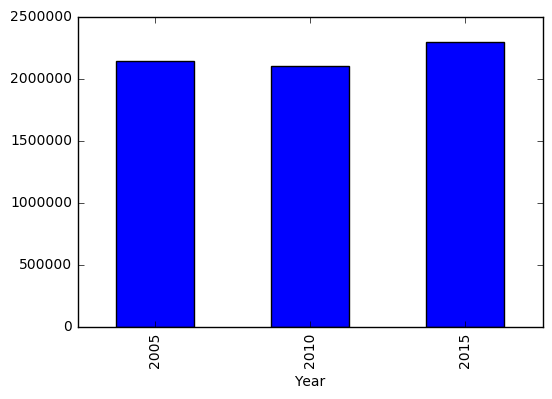

In [29]:
by_year.plot(kind = "bar")

#### 我们可以用一句话重写上述过程，这样看起来更加简洁。

0        False
1        False
2         True
3        False
4        False
5         True
6        False
7        False
8         True
9        False
10       False
11        True
12       False
13       False
14        True
15       False
16       False
17        True
18       False
19       False
20        True
21       False
22       False
23        True
24       False
25       False
26        True
27       False
28       False
29        True
         ...  
30876    False
30877    False
30878     True
30879    False
30880    False
30881     True
30882    False
30883    False
30884     True
30885    False
30886    False
30887     True
30888    False
30889    False
30890     True
30891    False
30892    False
30893     True
30894    False
30895    False
30896     True
30897    False
30898    False
30899     True
30900    False
30901    False
30902     True
30903    False
30904    False
30905     True
Name: Year, dtype: bool

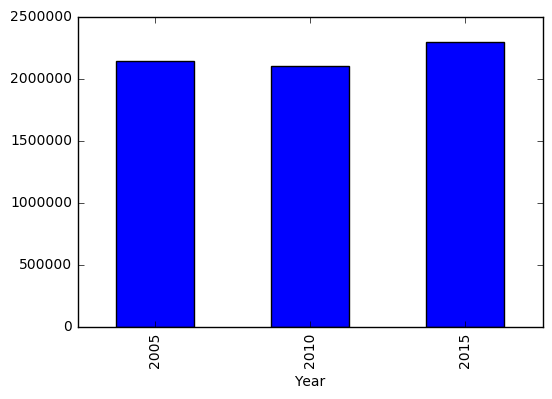

In [6]:
# Making syntax easier to read. \ tells Python to continue to the next line before executing 
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind = "bar")

df.Year == 2015

<a id="gender"></a>
## 死亡: 男性 vs. 女性

在2015年，哪个性别死亡率更高？

In [7]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### <font color="red"> 练习: </font>你可以创建一个简单的图来表示每个性别的死亡总数吗?

注意，使用2015年的数据。

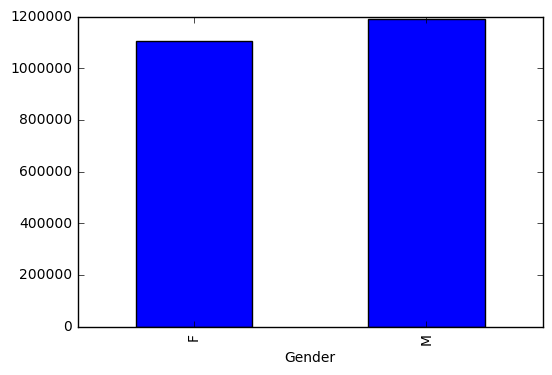

In [33]:
## HIDE AS SOLUTION:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar")

让我们给图上色: <font color=red>红色</font>表示女性and  <font color=蓝色>blue</font> 男性.
我们可以这样添加颜色：
> `.plot(kind = "bar", ` **`color = ["red", "blue"]`**`)`

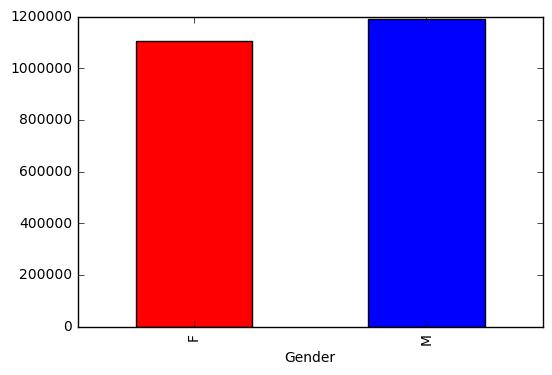

In [34]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar", color = ["red", "blue"])

<a id="age"></a>
## 死亡: 年龄

2015年死亡人员的年龄情况？

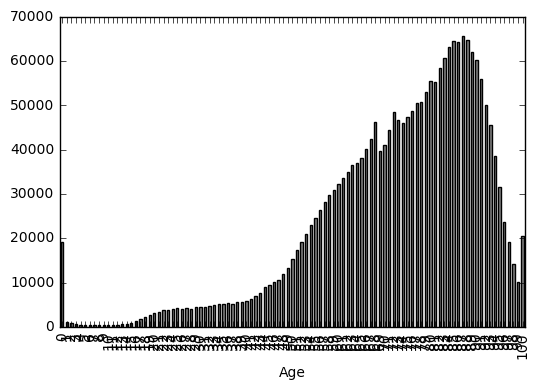

In [35]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey")

上面这张图比较难观察，太小了！

我们可以增大图的尺寸
> `.plot(kind = "bar",`** figsize = [18,6]**`)`

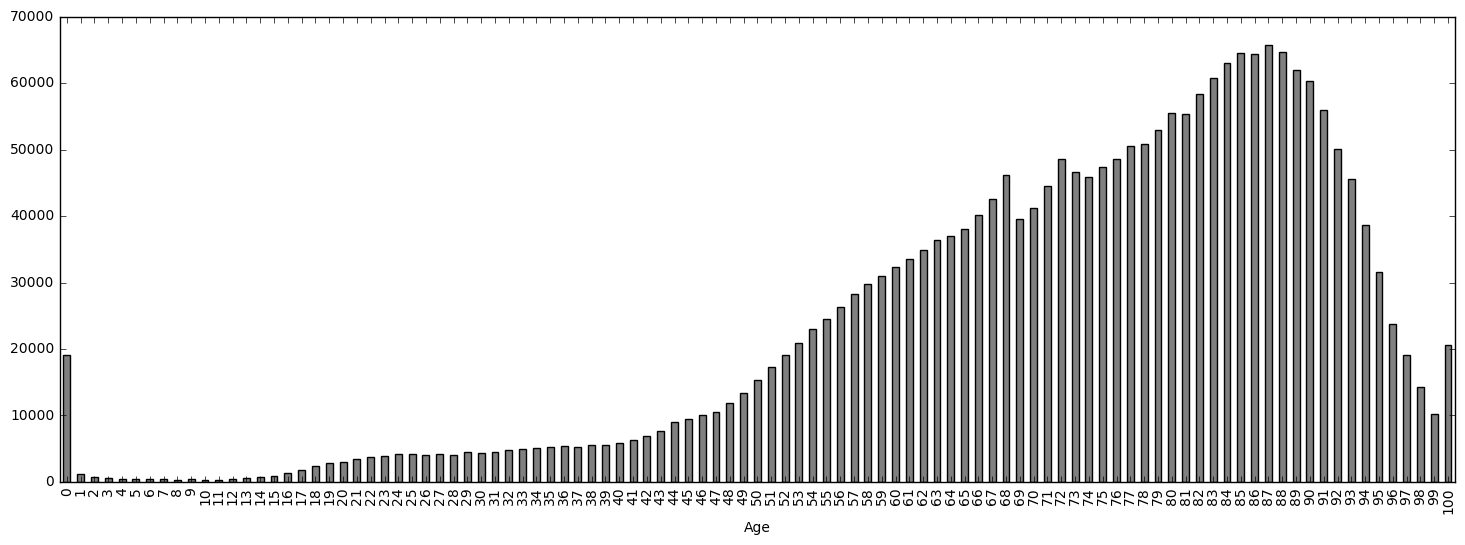

In [36]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey", figsize = [18,6])

<font color="green"> 讨论: 你从图中发现了什么? </font>

<a id="ageXgender"></a>
## 死亡: 年龄和性别

#### 死亡年龄与性别有关吗？

根据两个变量进行分组：
> `.groupby(`**`["Age", "Gender"]`**`)`

In [37]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
     M           448
3    F           239
     M           372
4    F           191
     M           280
5    F           185
     M           252
6    F           197
     M           215
7    F           168
     M           191
8    F           149
     M           206
9    F           143
     M           215
10   F           117
     M           209
11   F           147
     M           207
12   F           166
     M           240
13   F           230
     M           311
14   F           282
     M           454
               ...  
86   F         34950
     M         29452
87   F         36181
     M         29581
88   F         36741
     M         27971
89   F         36253
     M         25708
90   F         36327
     M         23963
91   F         34454
     M         21538
92   F         31655
     M         18526
93   F         29469
     M         16069
9

#### 让我们创建两个子图，分别是女性和男性的死亡年龄。
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind = "bar", ` **` subplots = True`**`)`

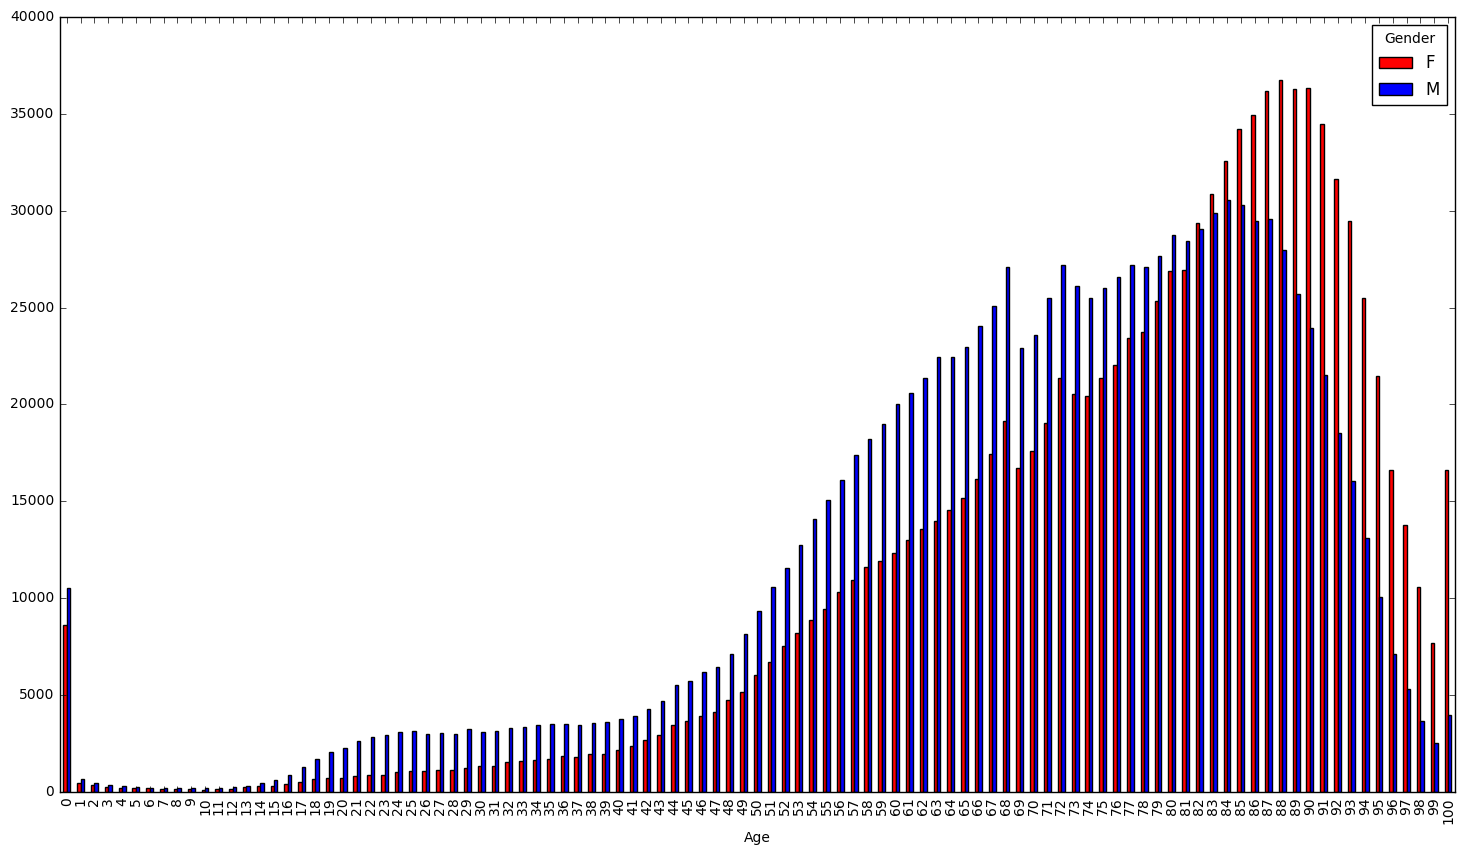

In [53]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10], subplots = True)

<font color="green"> 讨论: 从图中你发现了什么? </font>

我们可以把男性和女性的数据堆在一张图里：
>`.plot(kind = "bar", ` **`stacked = True`**`)`

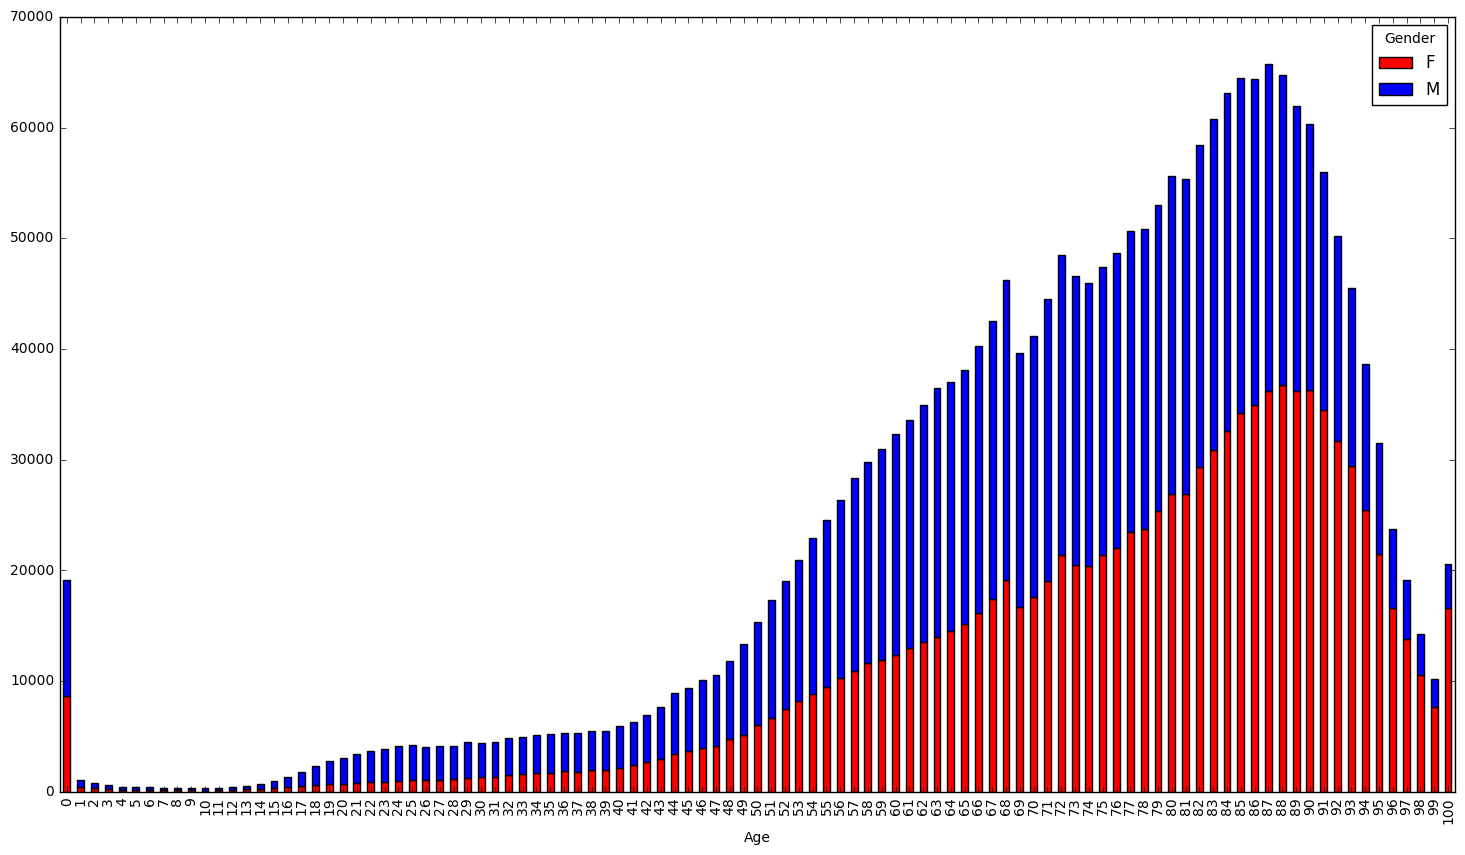

In [39]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10], stacked = True)

但是这并不能很好地对比两个性别的差距。

#### 因为年龄是数值变量，所以使用折线图可能更加容易对比:
> `.plot(kind = "`**`line`**`")`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9a22dea90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe9a1a5ba20>], dtype=object)

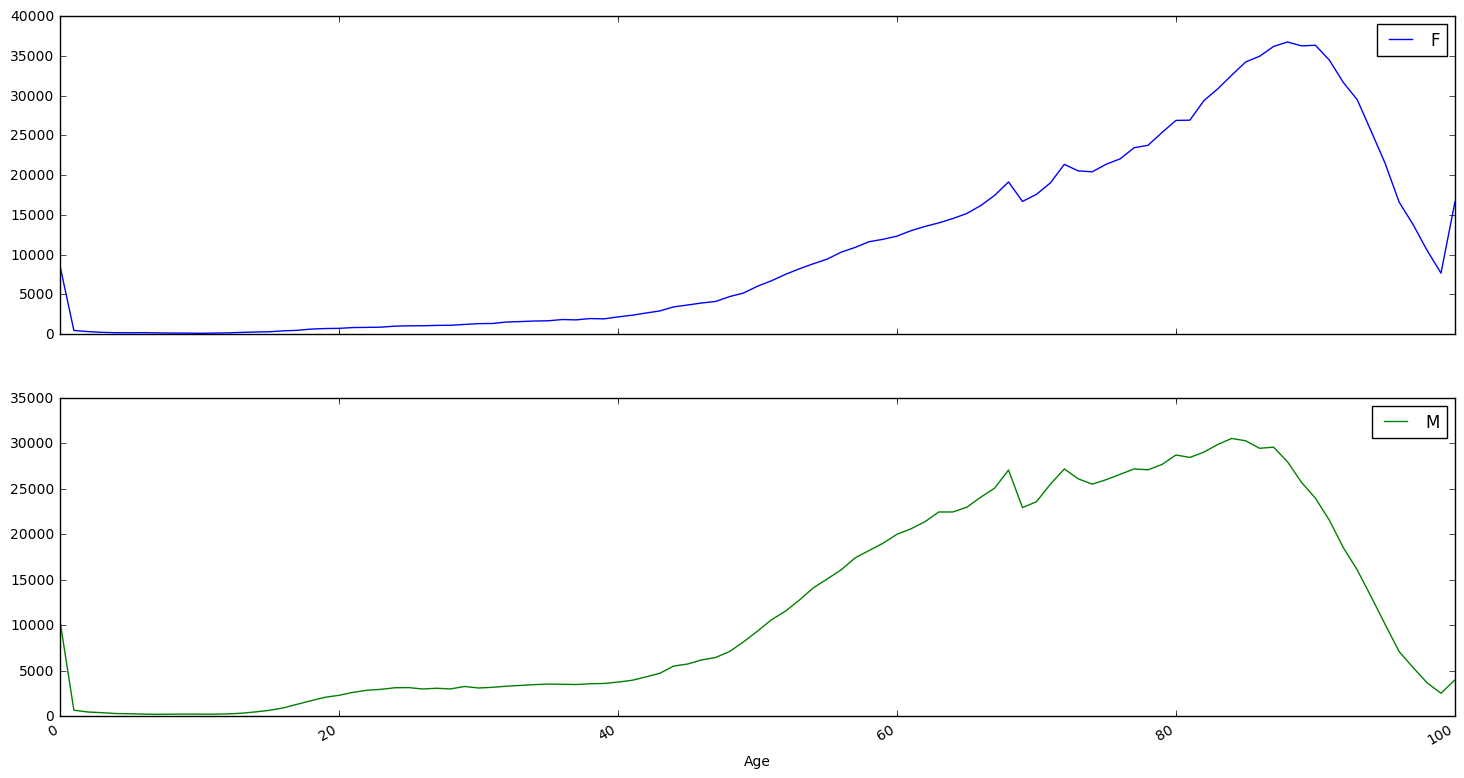

In [40]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", figsize = [18,10], subplots = True)

有了曲线之后，对比变得方便了，我们要把两根线同时绘制到一张图:
>`...`  
>**`.unstack(1)`**`\`  
>`.plot(kind = "line")   #Default: subplots = False`

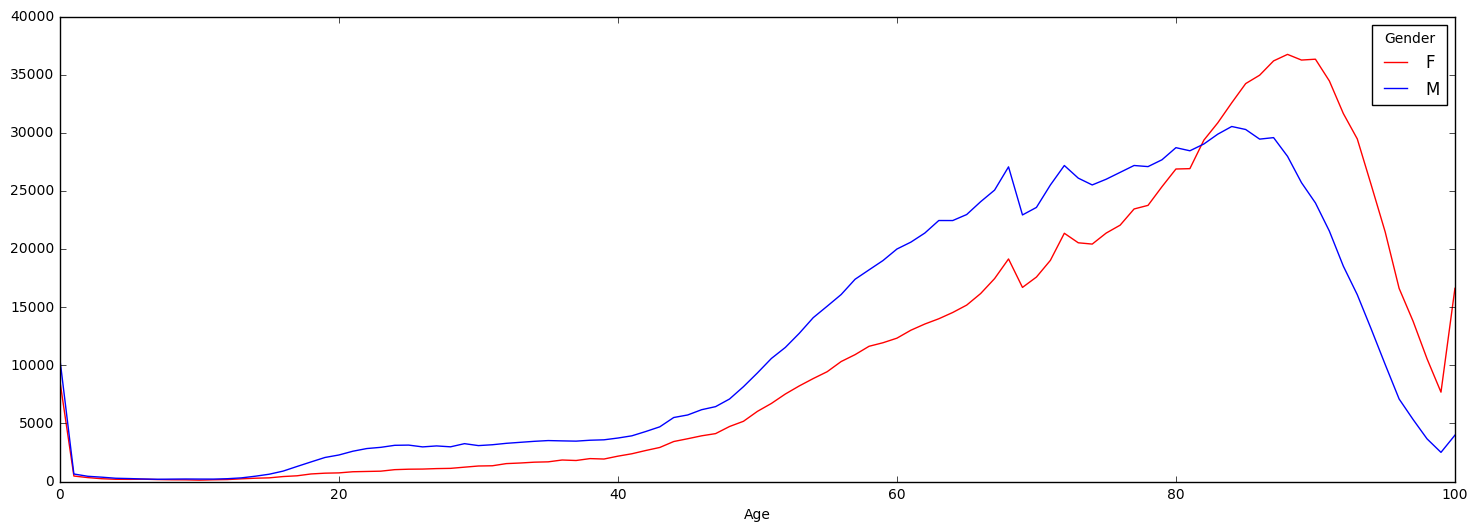

In [52]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [18,6])

让我们增加一个题目和y坐标的名称。

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


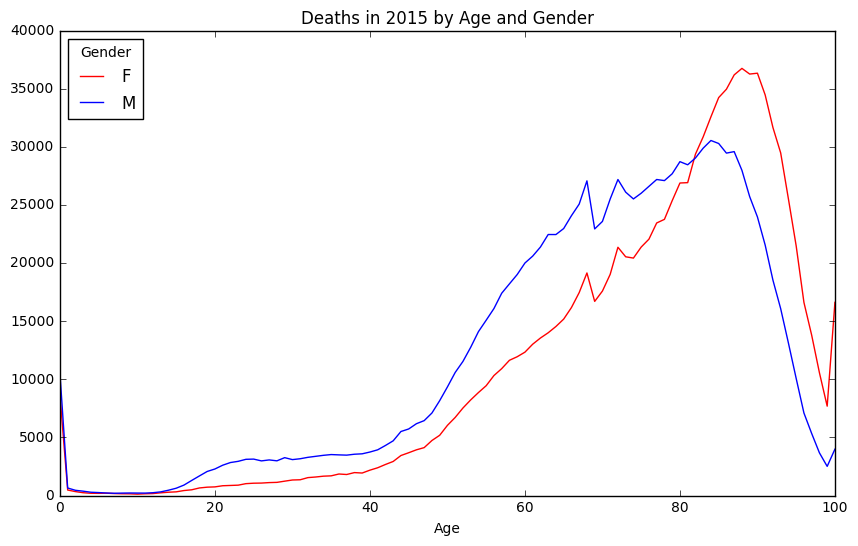

In [42]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [10,6], title = "Deaths in 2015 by Age and Gender")

<a id="causeX2015"></a>
## 死亡: 2015年最大死因

In [ ]:
让我们查看一下2015年最大的死因。

In [9]:
type(df2015\
.groupby(["Cause"])\
.Deaths\
.sum()\
     )


pandas.core.series.Series

这张图观察起来非常困难，我们需要先对数据**排序**，然后将图表**旋转90度**。
1. 数据排序:
> **`.sort('Deaths', ascending = True)`**

2. 创建水平柱状图 
> **`.plot(kind = "barh")`**

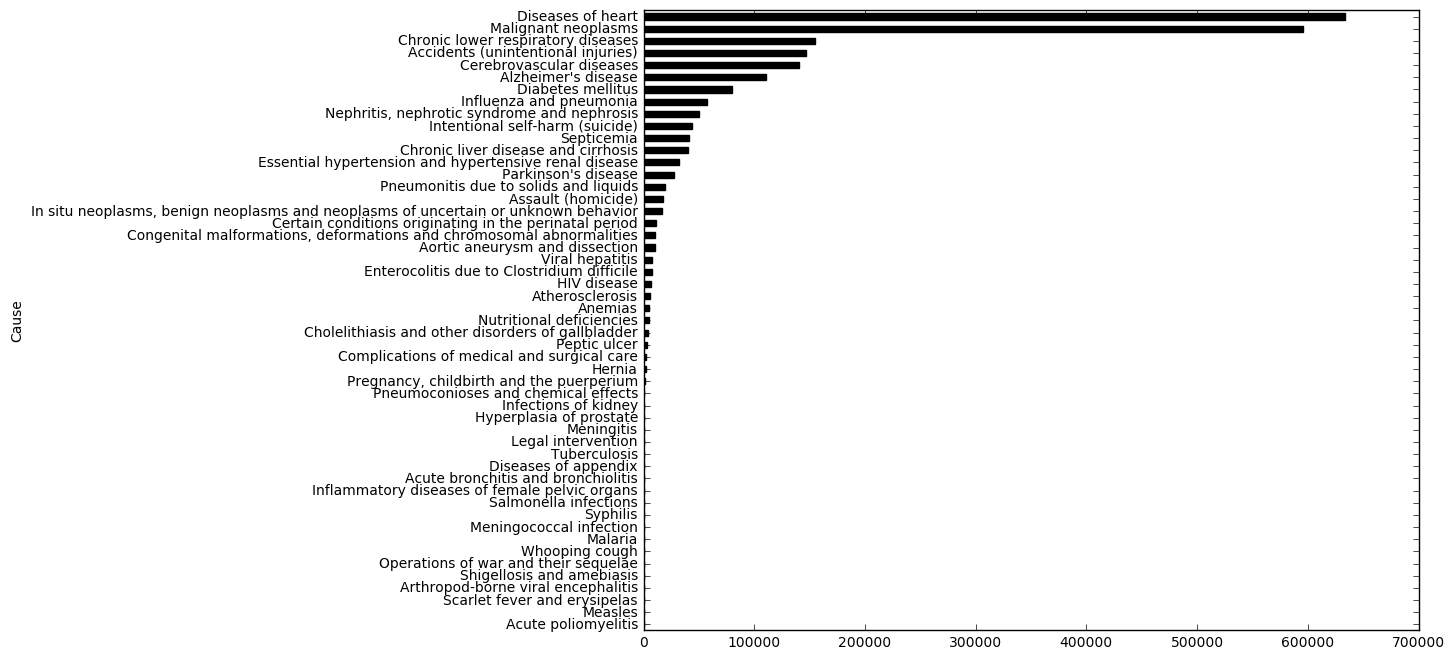

In [48]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = True)\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8])

#### 让我们找出2015年十大死因

我们可以早排序后取最后的10个：:
>`.sort('Deaths', ascending = True)`**`[-10:]`**`\`

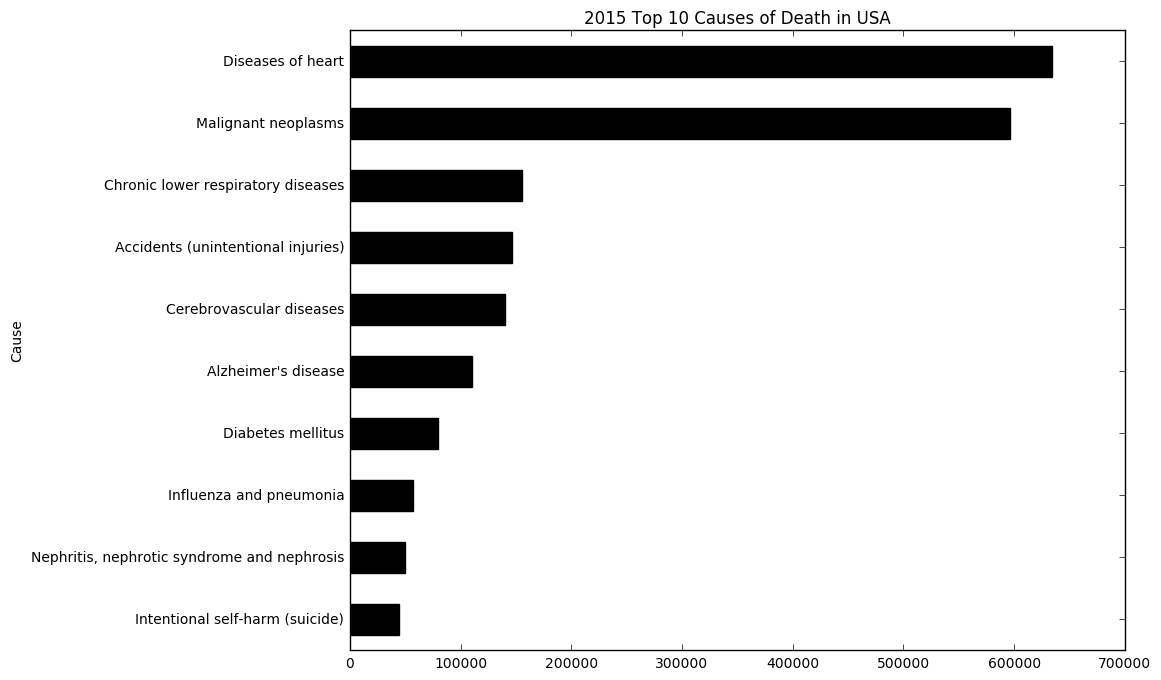

In [49]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths')[-10:]\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8], title = "2015 Top 10 Causes of Death in USA")

<a id="causeXyear"></a>
## 死亡: 每年的最大死因

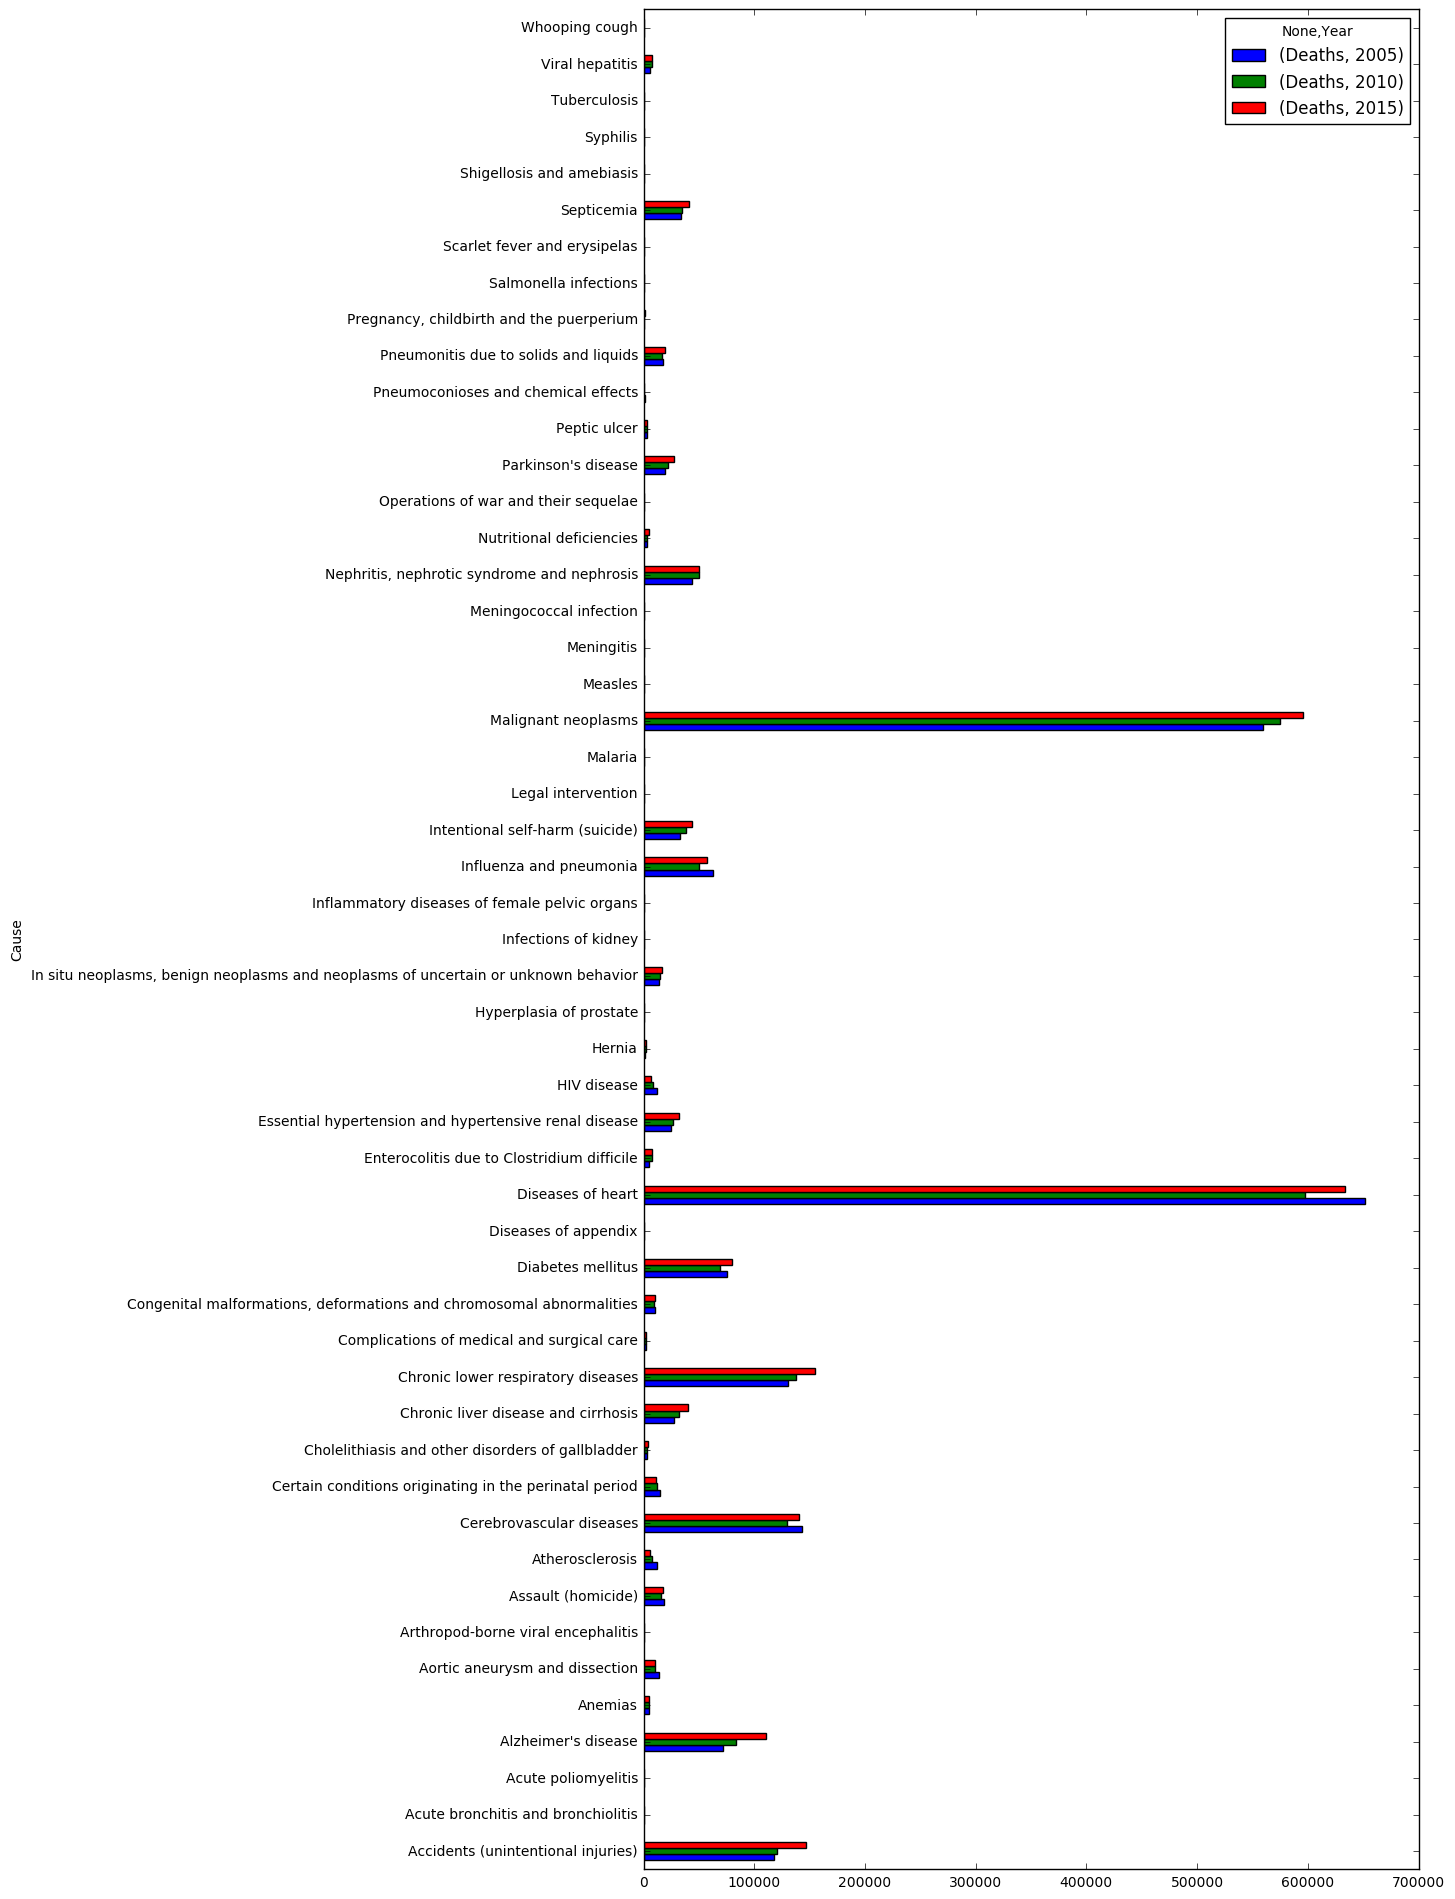

In [50]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind = "barh", legend = True, figsize = [10,24])

这张图内容太多，有很多信息并不直观，例如，你注意到HIV的死亡率在2005年后逐渐走低了吗？


<a id="causeXgender"></a>
## 死亡: 跟性别有关的死因

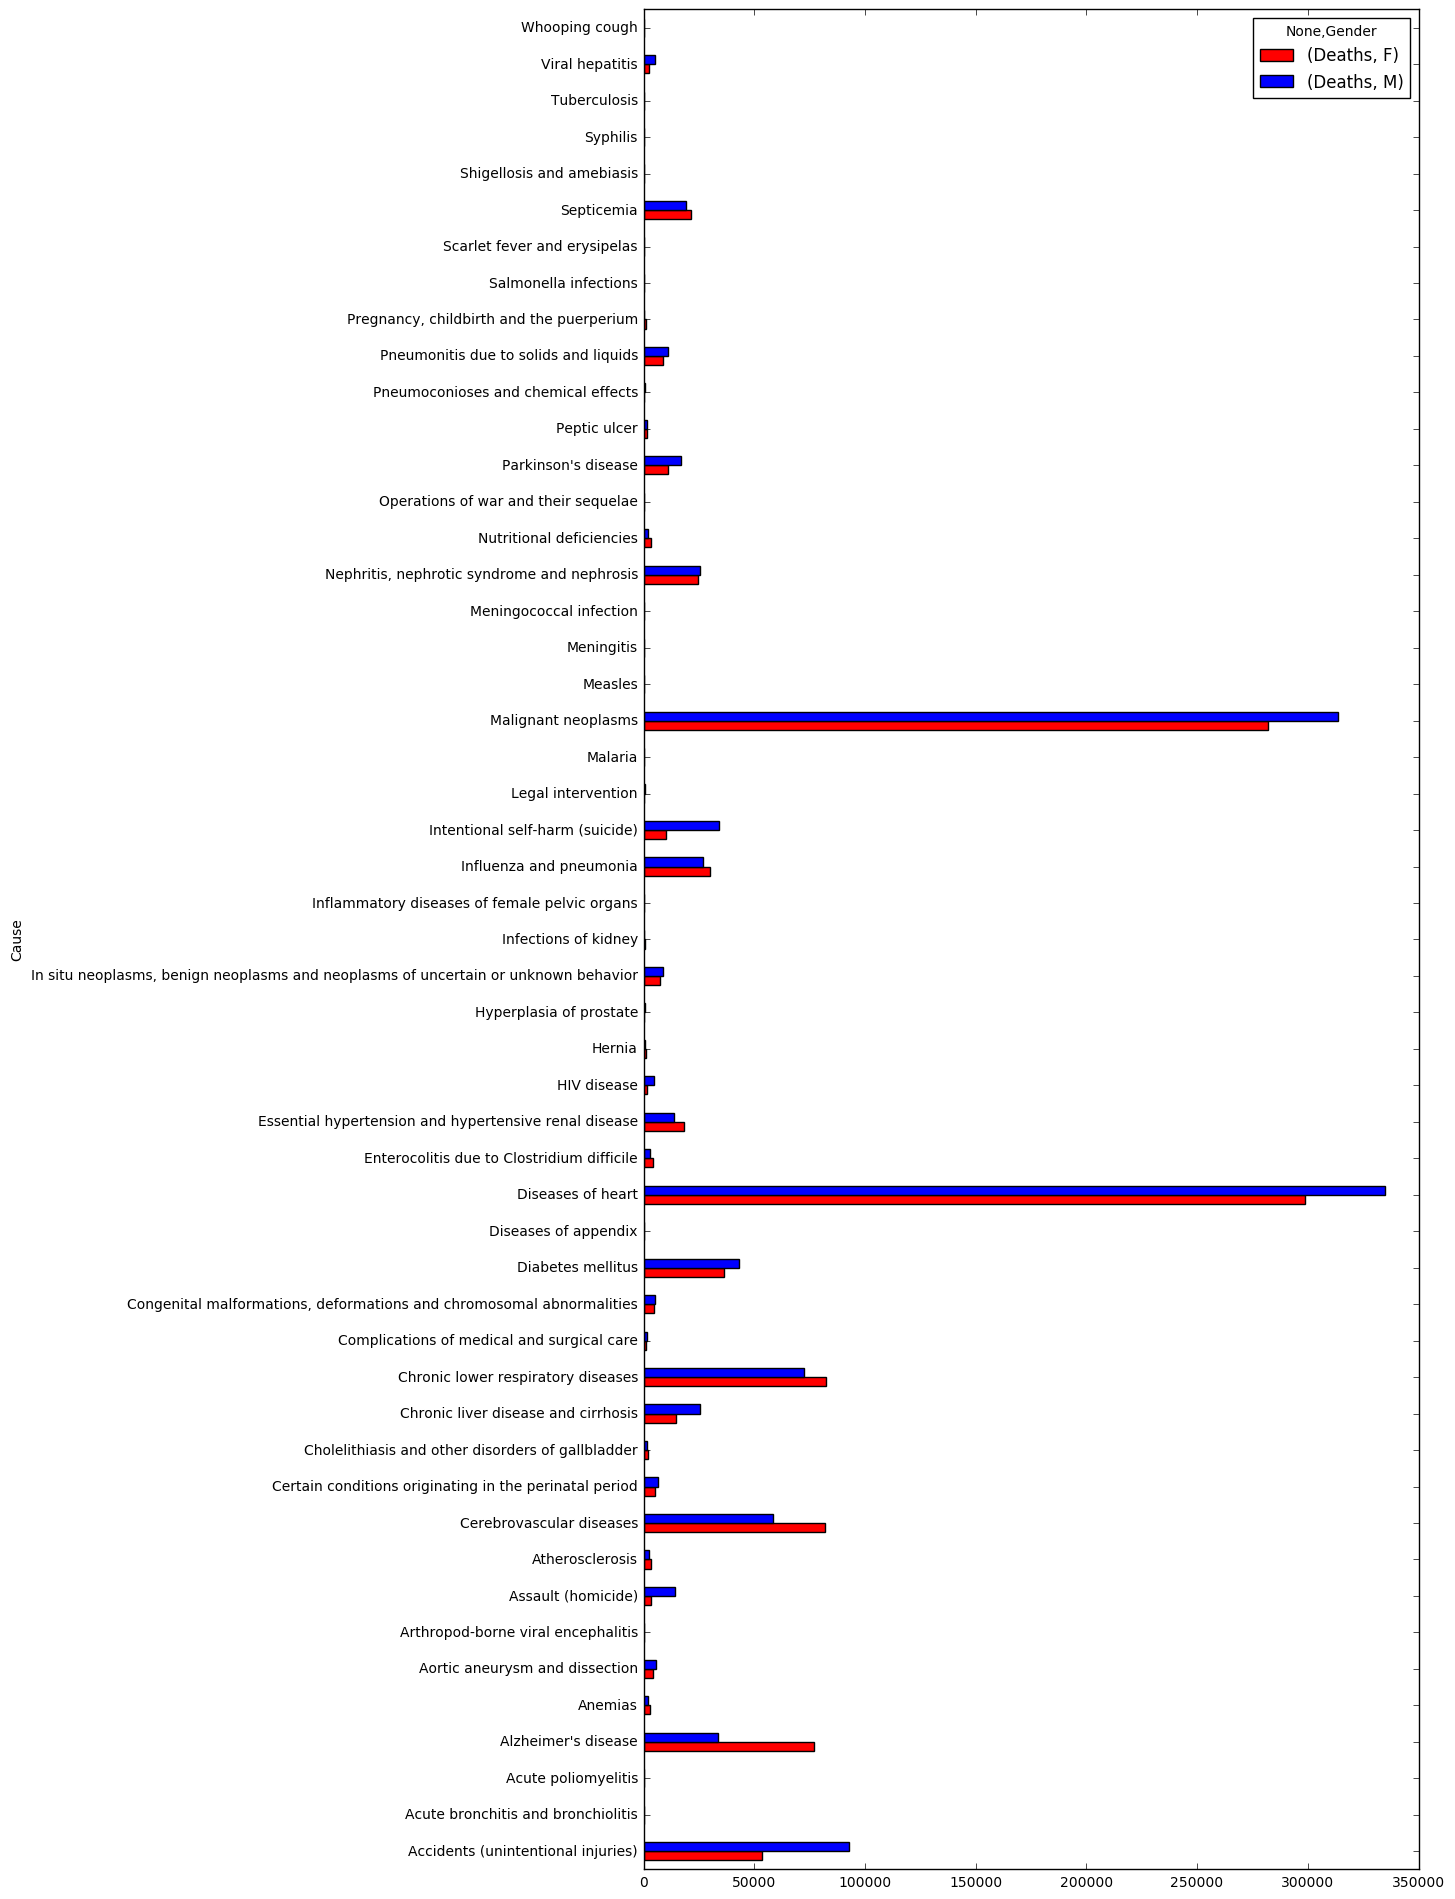

In [54]:
df2015\
.sort_values('Deaths', ascending = False)\
.groupby(["Cause","Gender"])\
.agg({'Deaths' : sum})\
.unstack(1)\
.plot(kind = "barh", color = ["red", "blue"], legend = True, figsize = [10,24])

<a id="causeXage"></a>
## 死亡: 跟年龄有关的死因

因为这里死因太多了，年龄也多，交叉在一起图表会非常地大，所以我们只选择其中一些死因来可视化：

- "Alzheimer's disease" 
- "Diseases of heart" 
- "Malignant neoplasms" 
- "Accidents (unintentional injuries)"

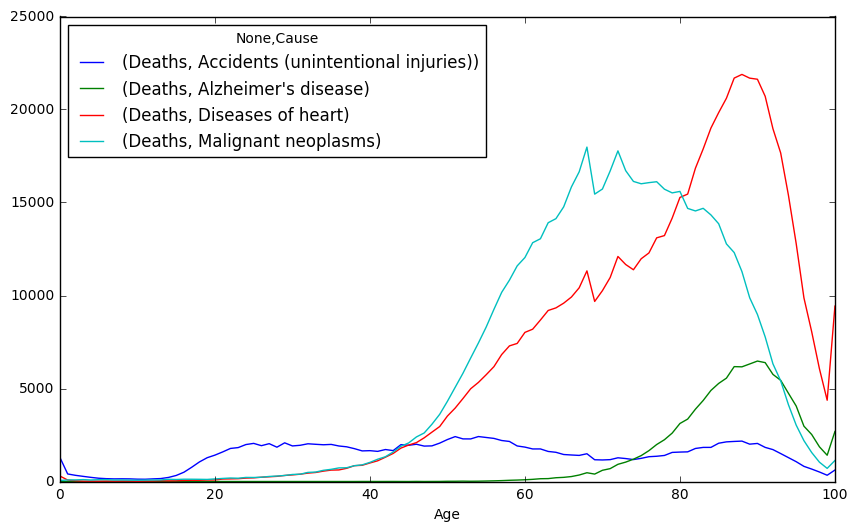

In [55]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

df2015_clist = df2015[df2015["Cause"].isin(clist)]

df2015_clist\
.groupby(["Age","Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind = "line", legend = True, figsize = [10,6])

<a id="causeXgenderXage"></a>
## 死亡: 死因与性别、年龄的关系

对两个性别、三个年份、51种死因的交叉可视化是十分苦难的。因为内容太多，难以放入一张图中。
最好的做法是选择性地展示一些有意义的数据。


/home/irving/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


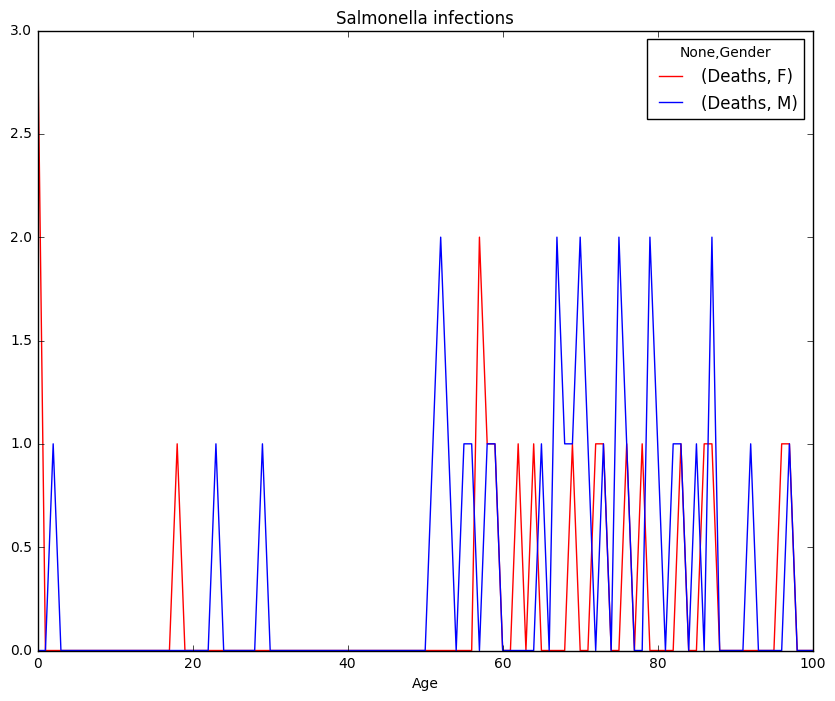

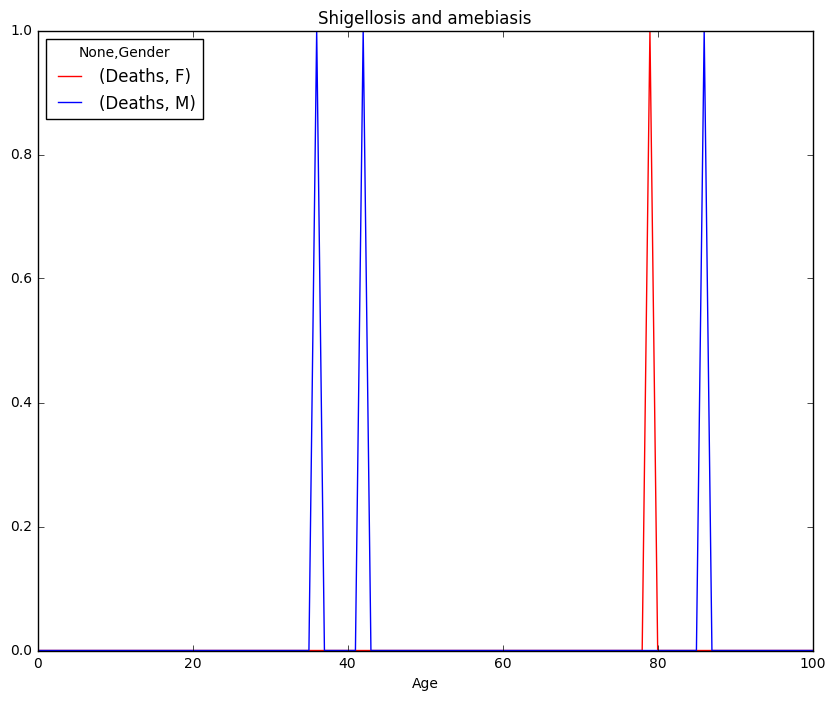

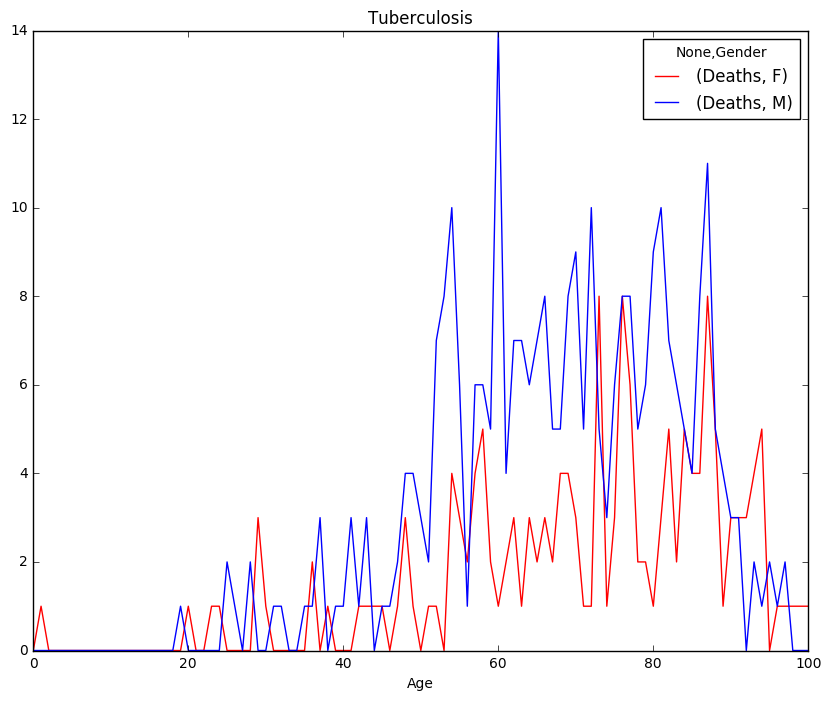

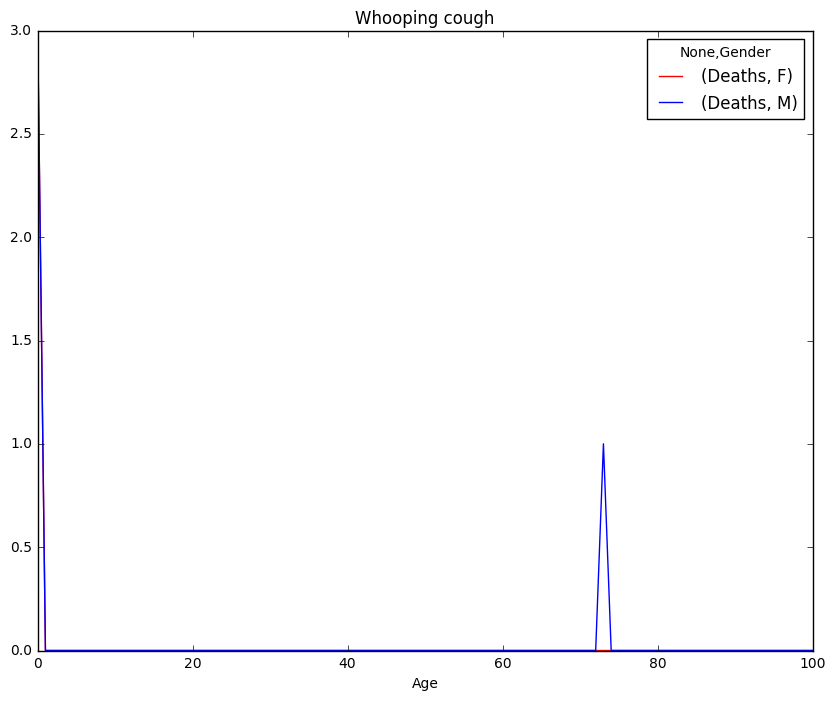

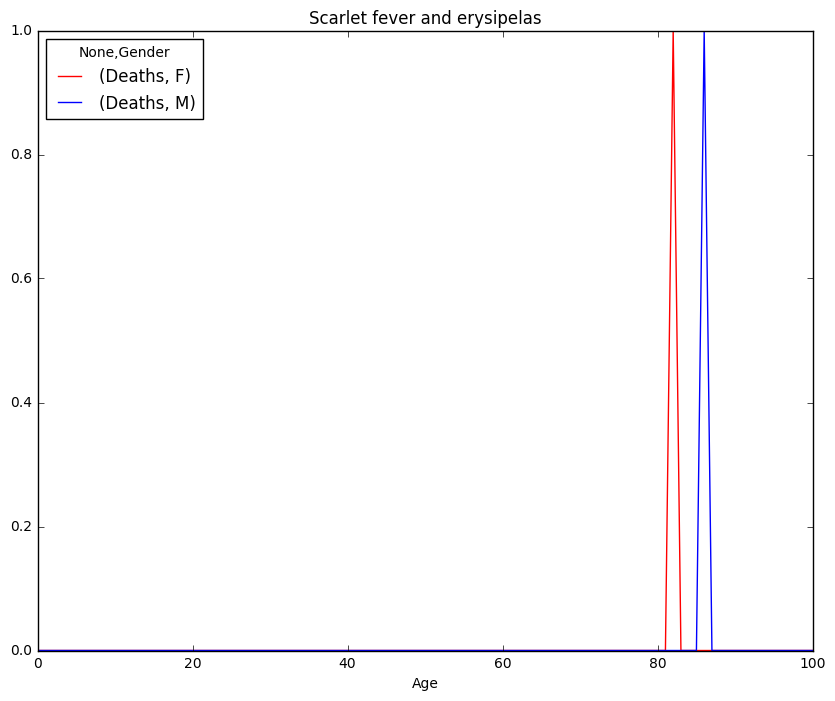

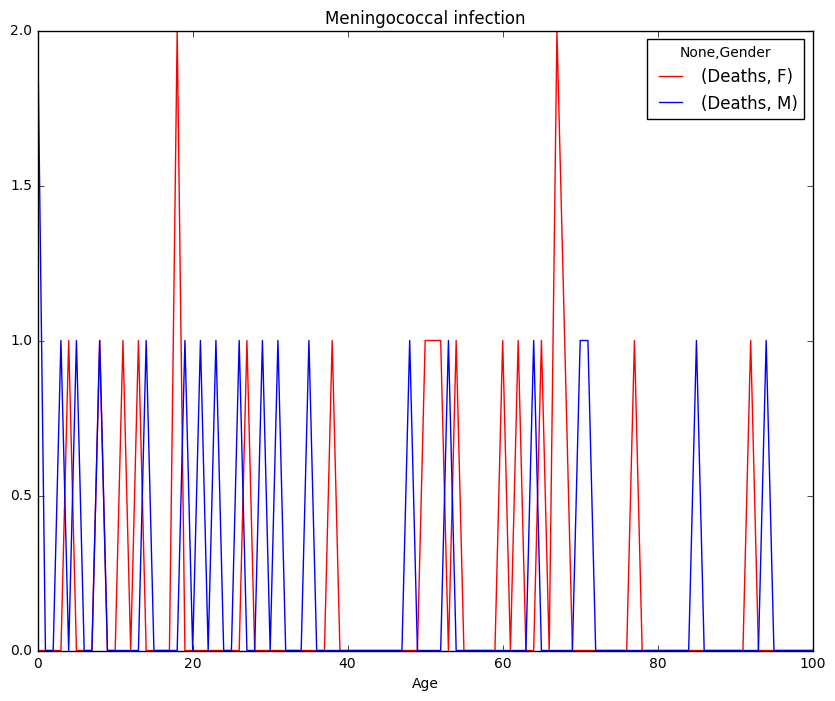

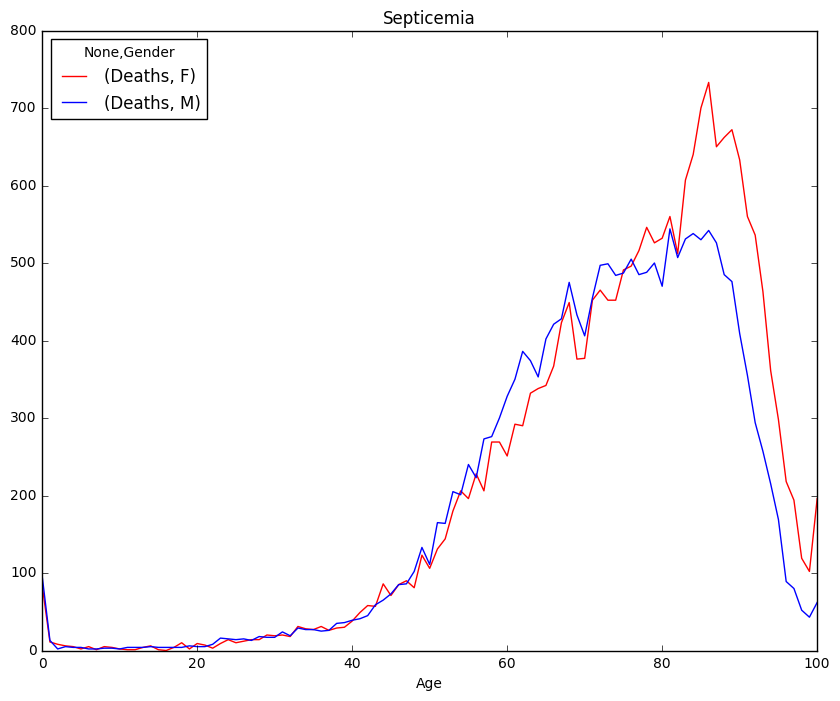

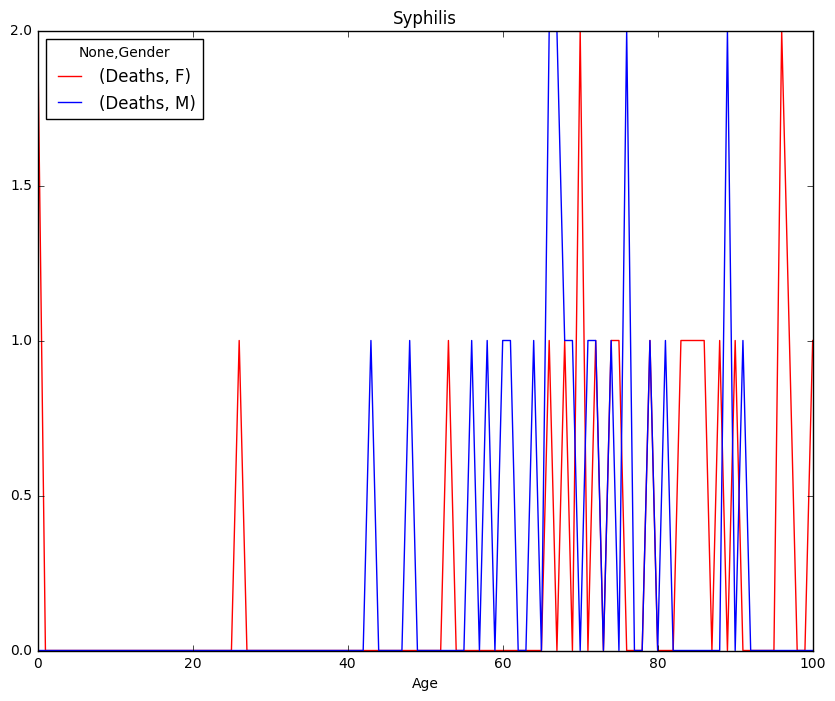

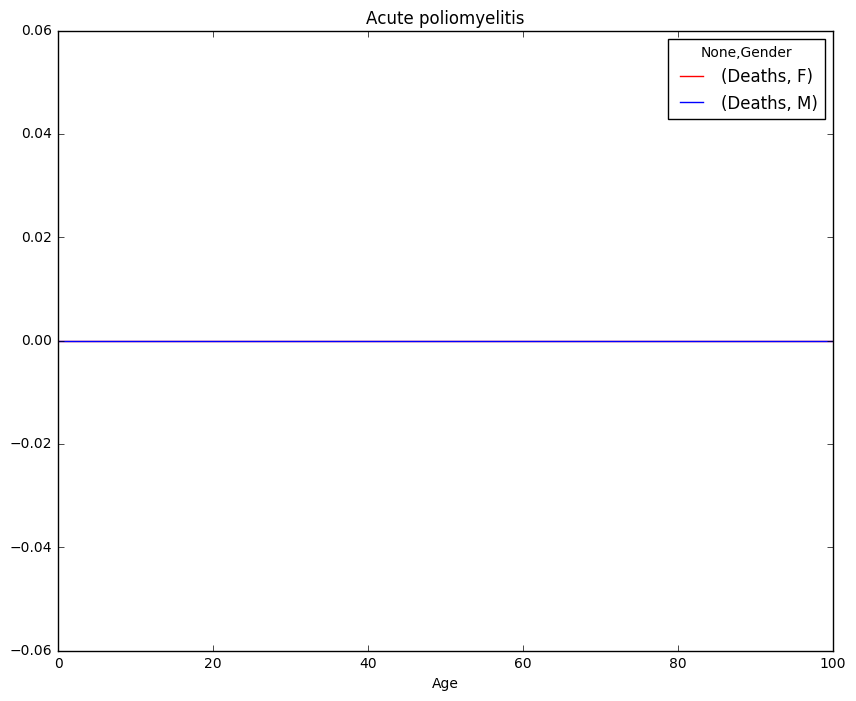

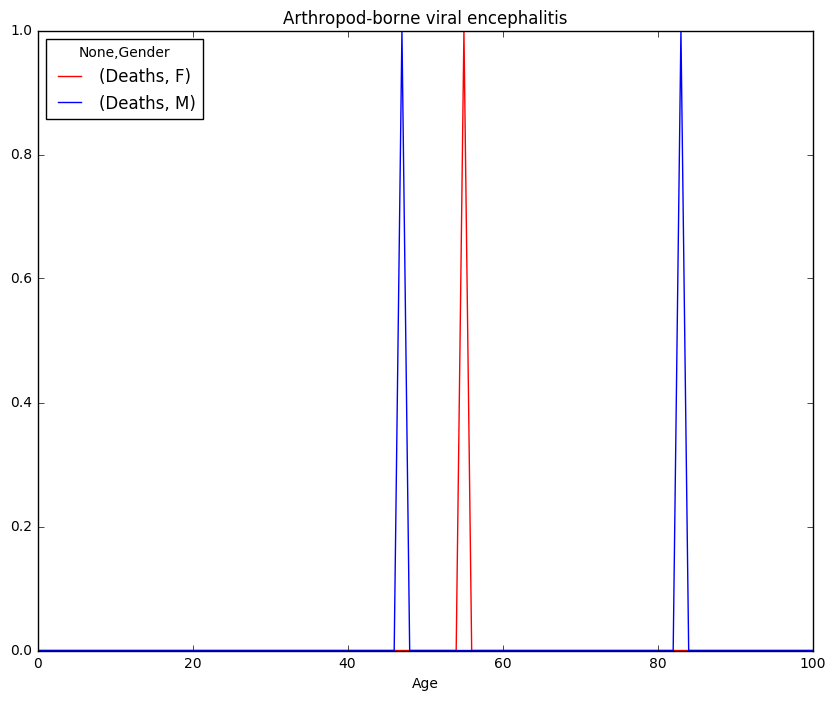

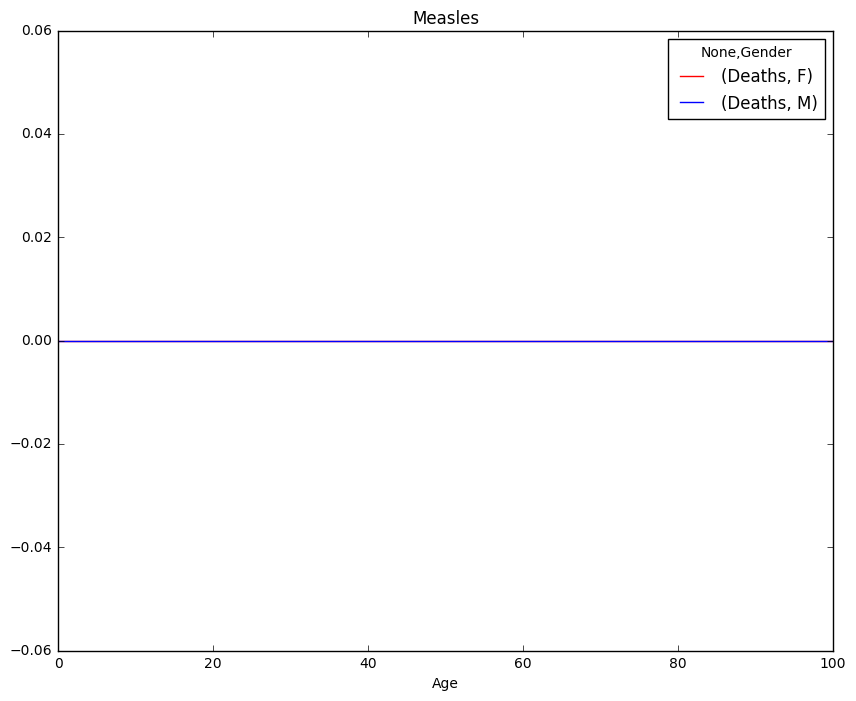

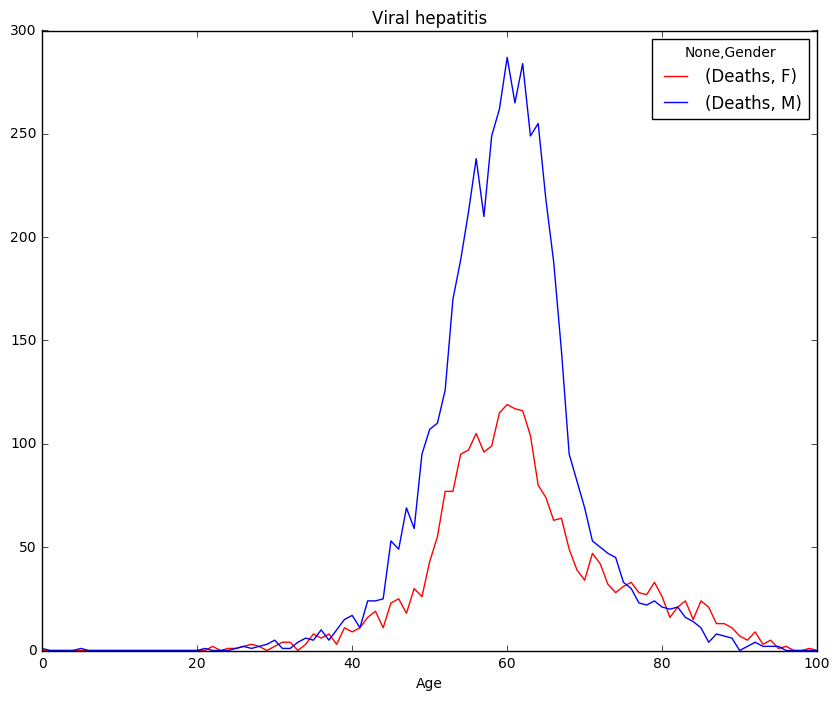

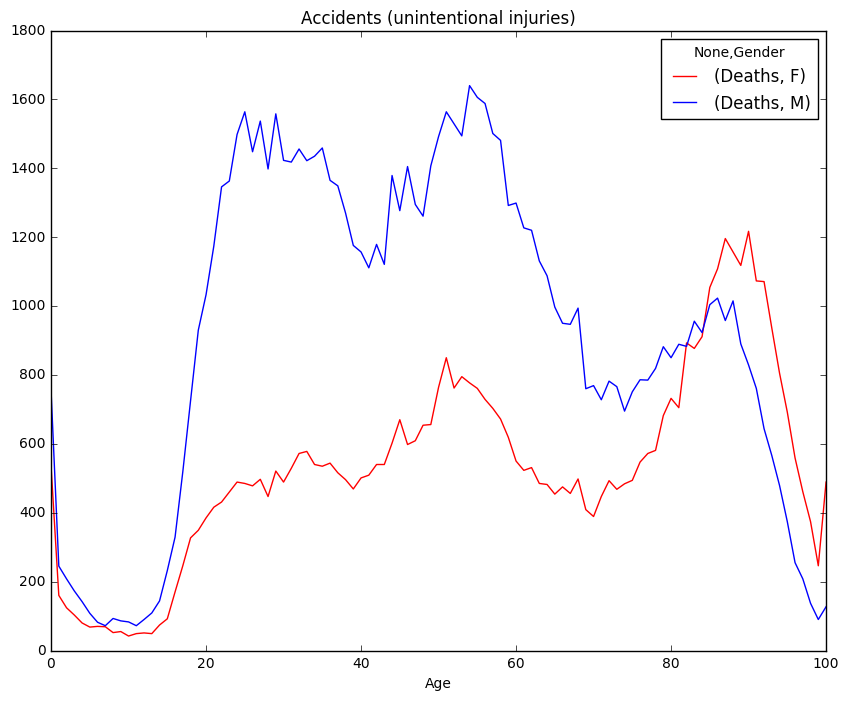

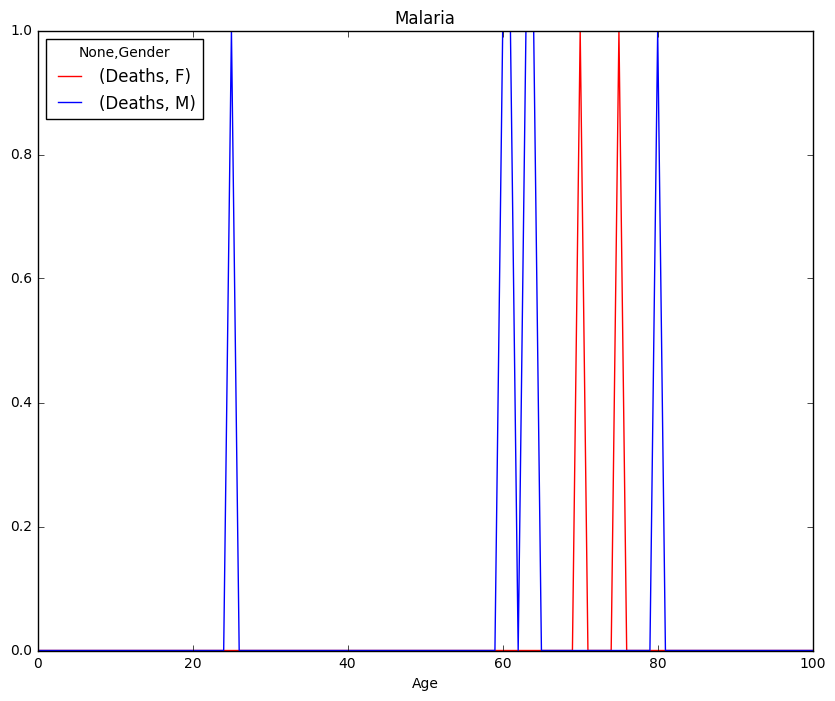

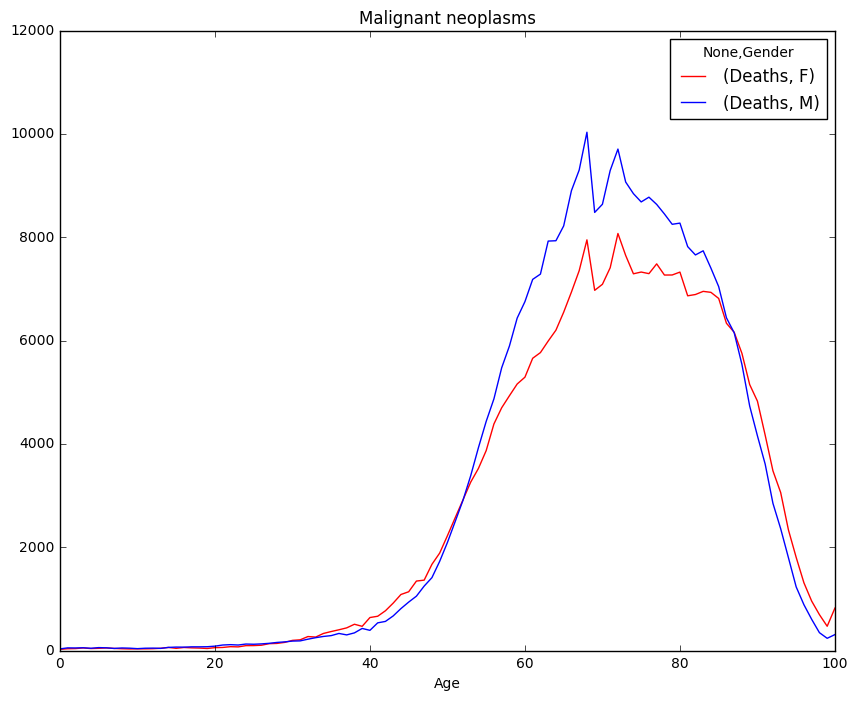

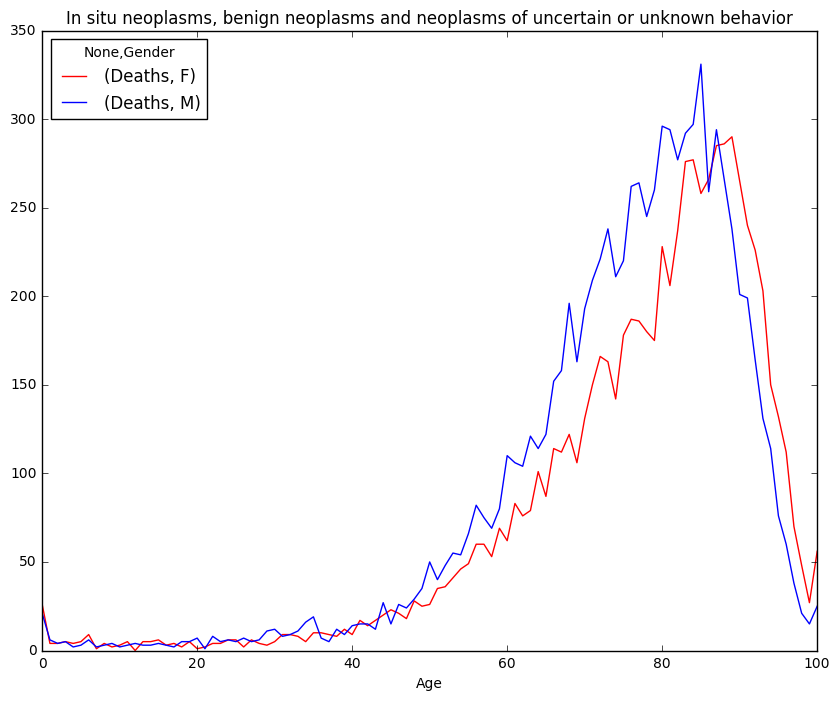

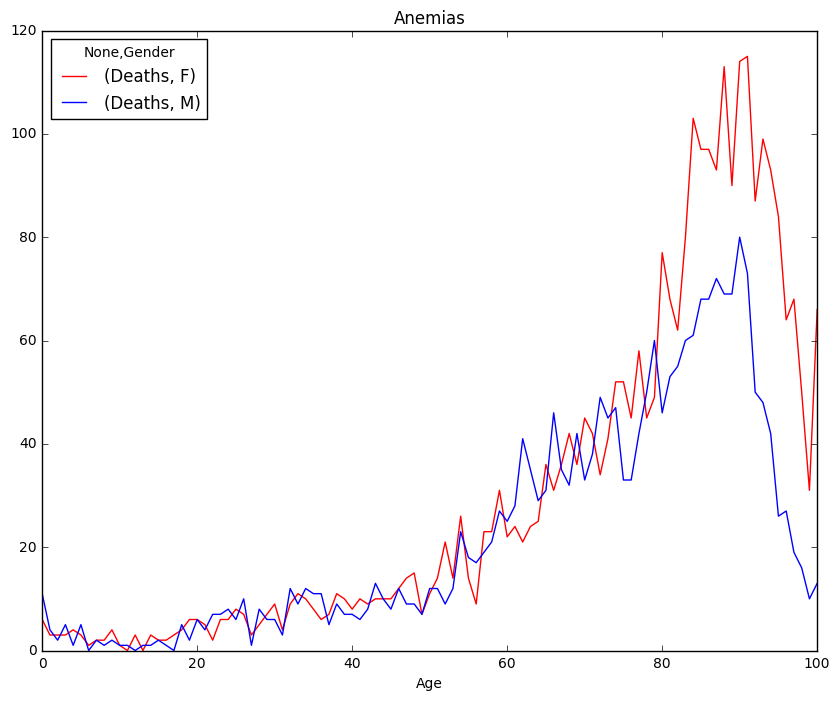

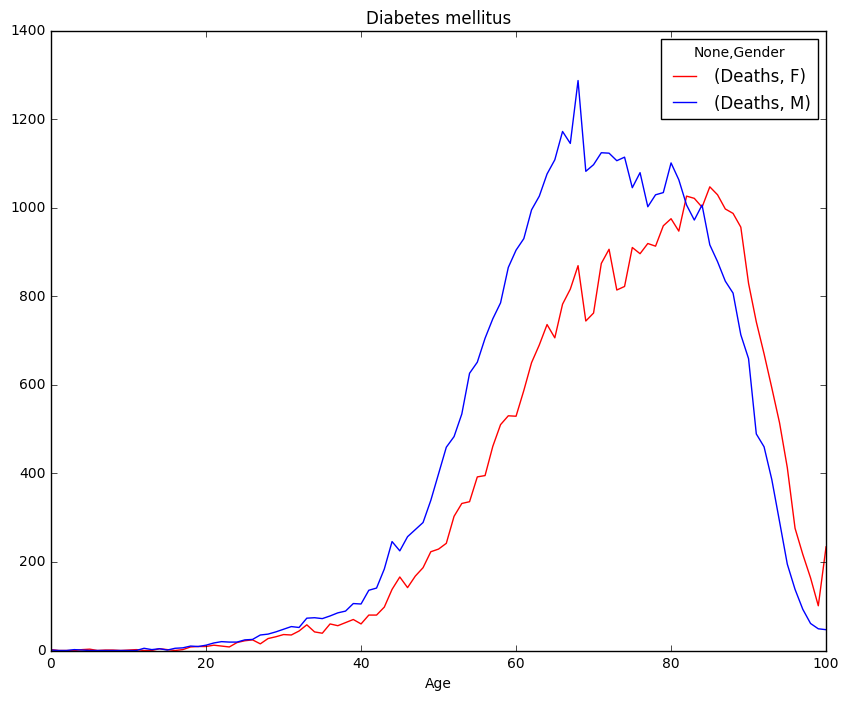

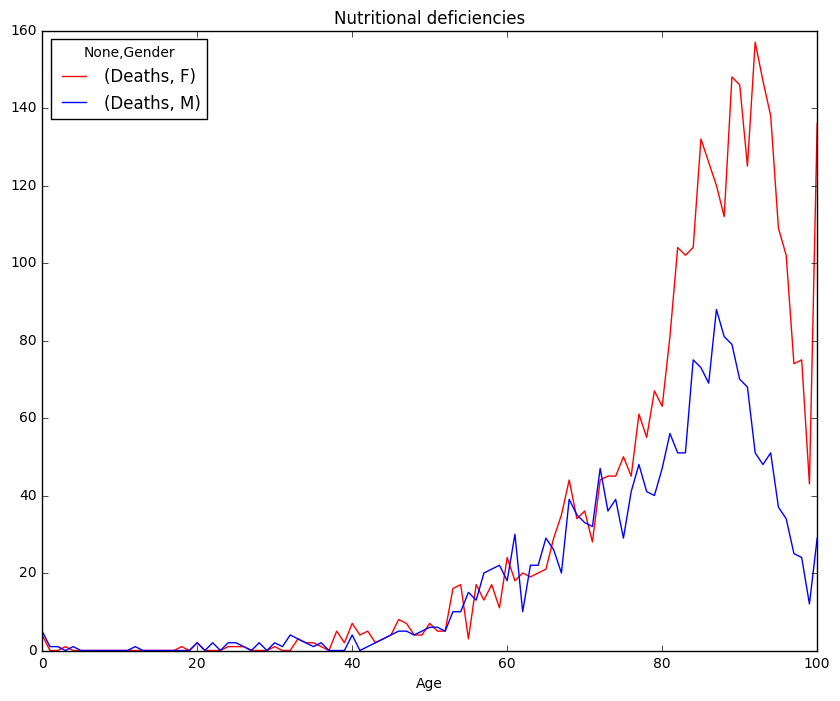

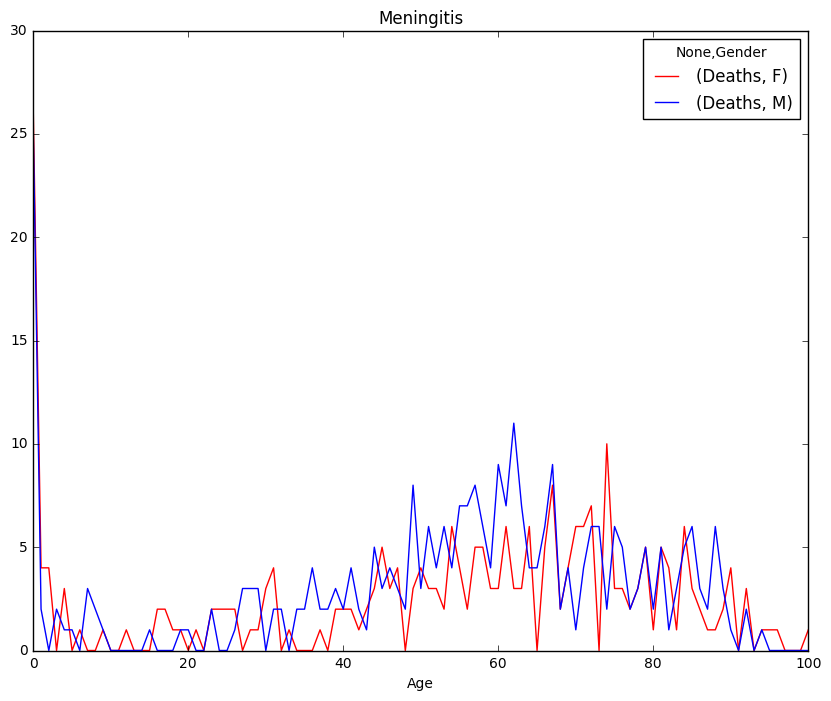

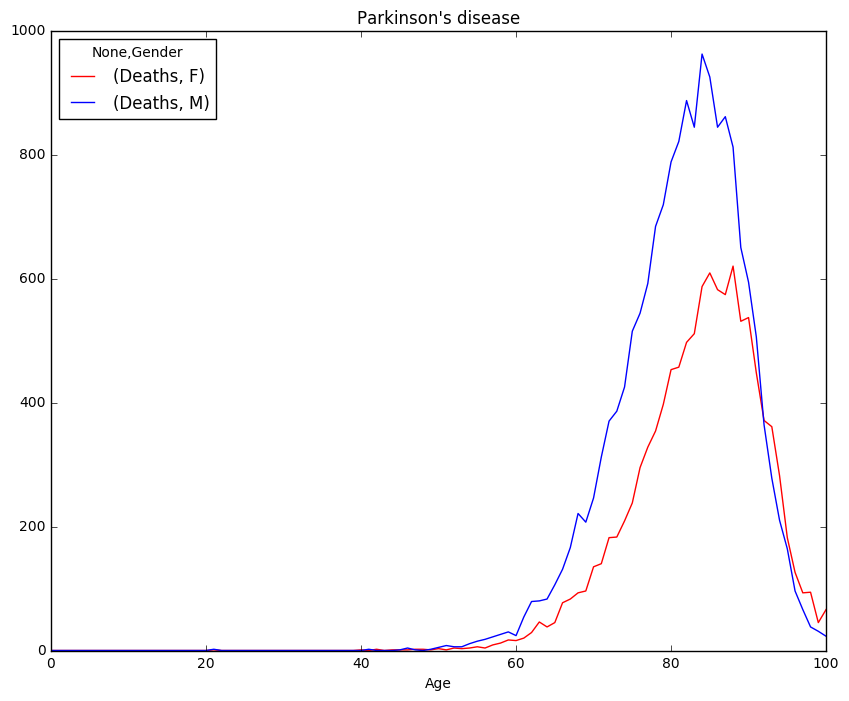

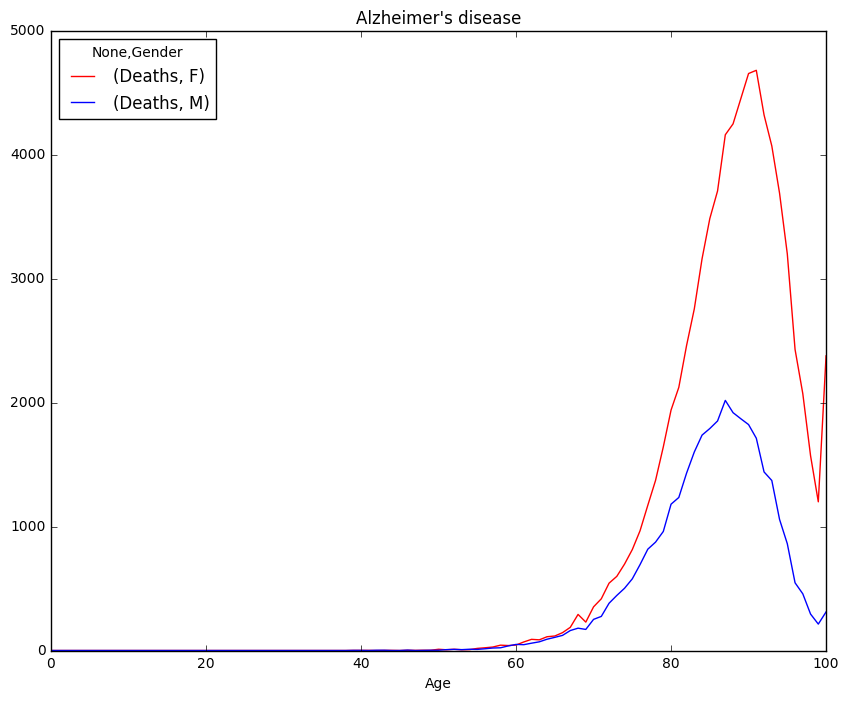

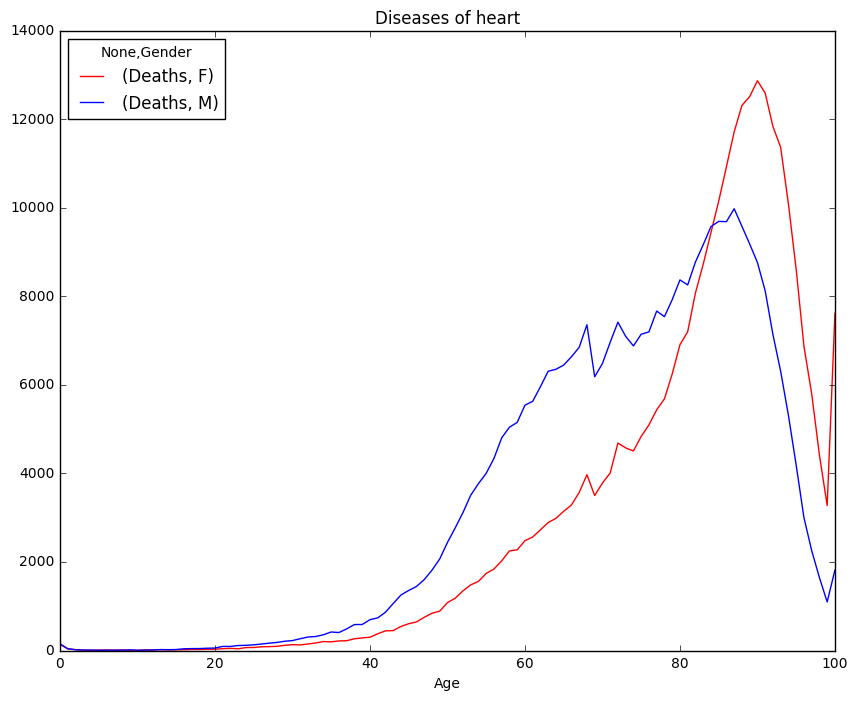

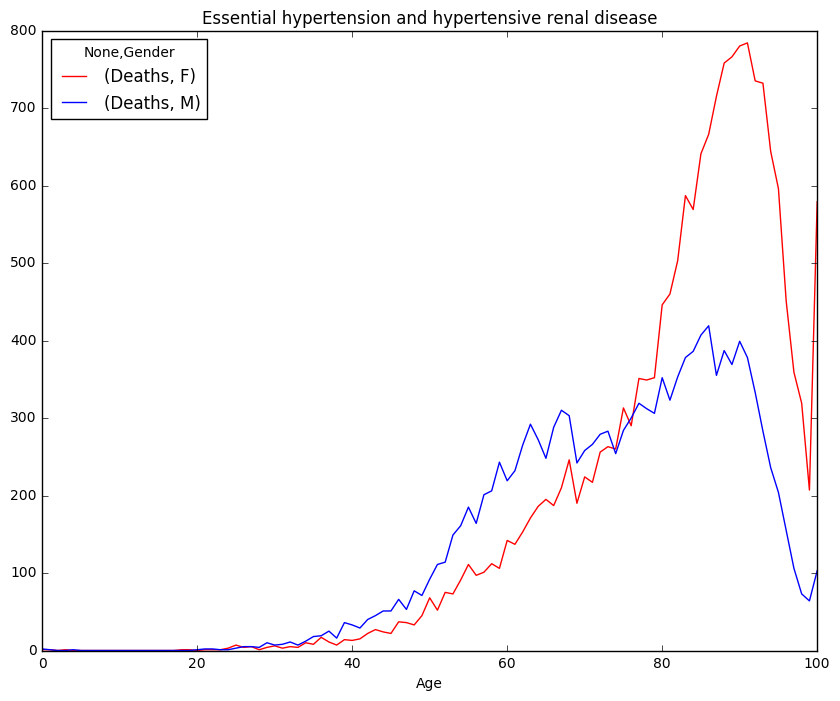

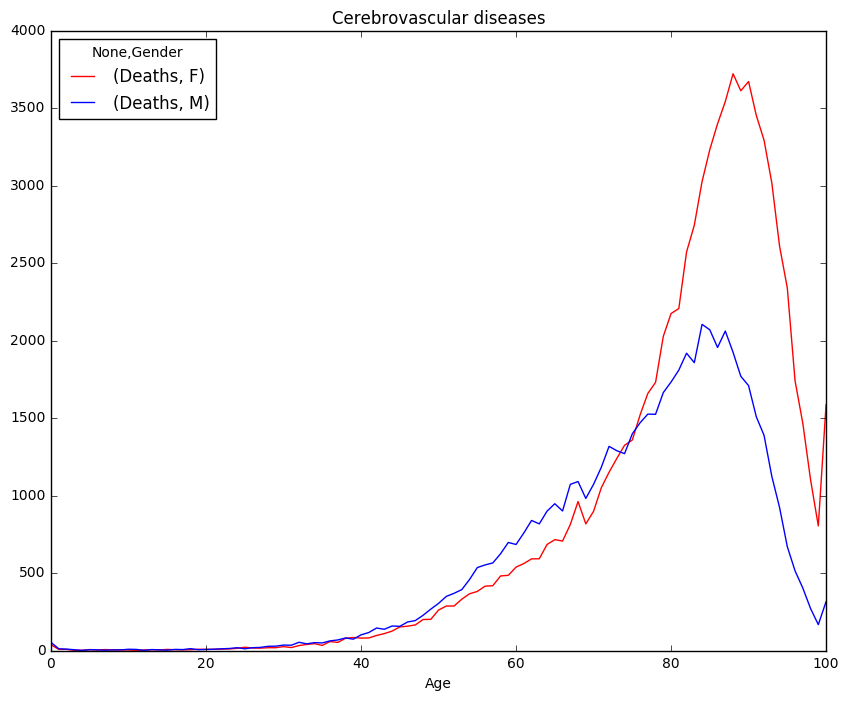

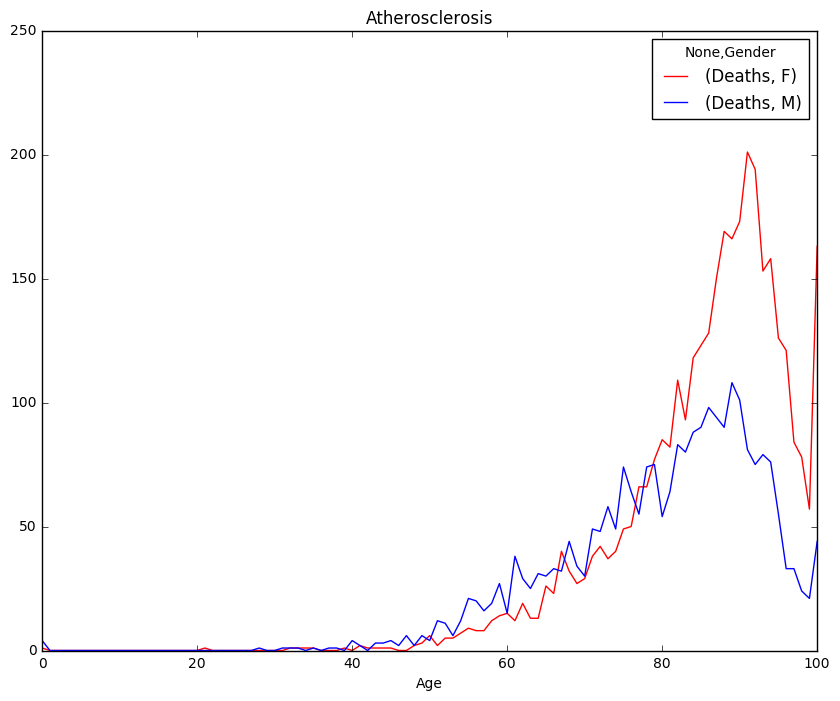

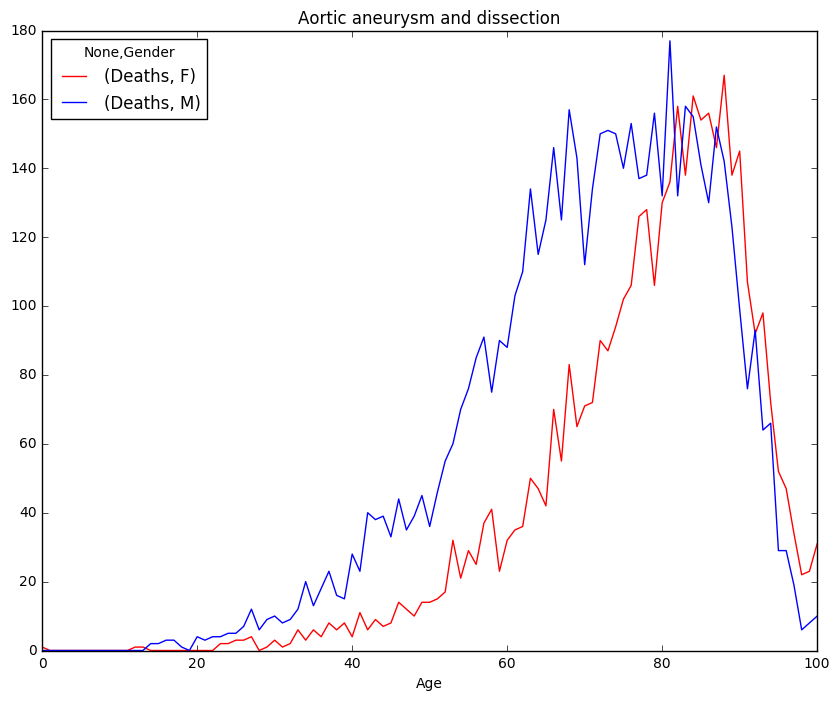

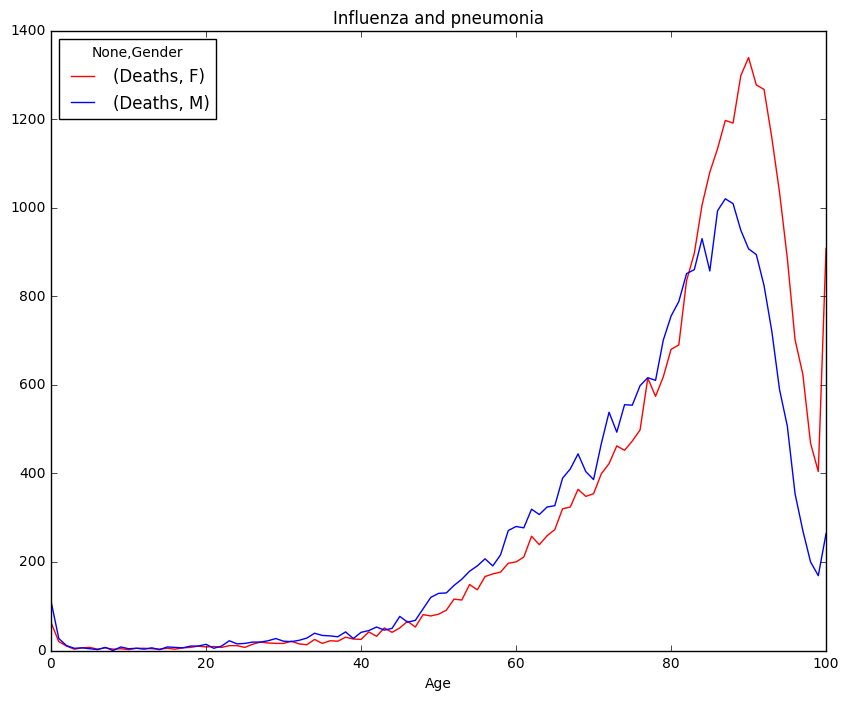

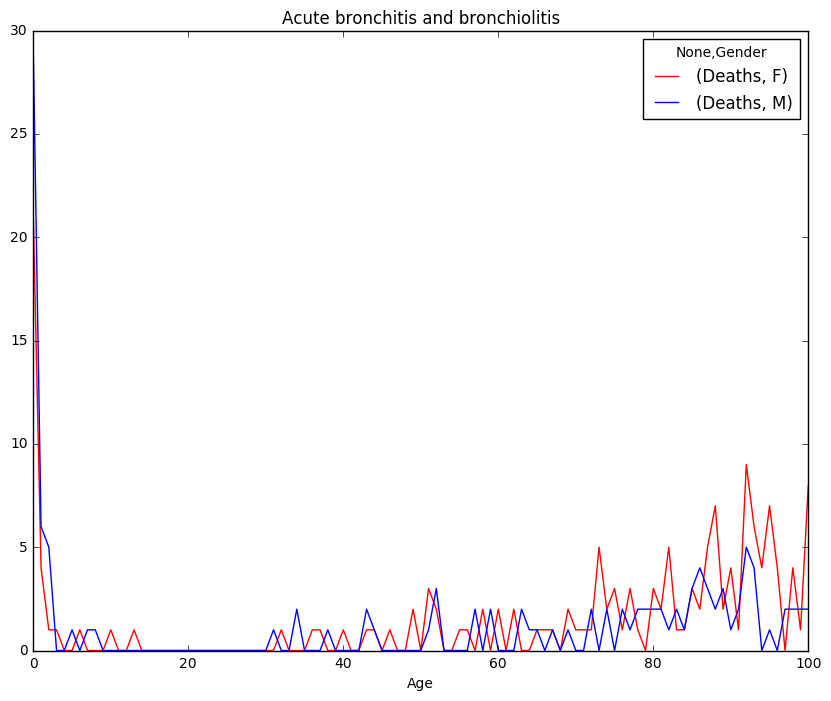

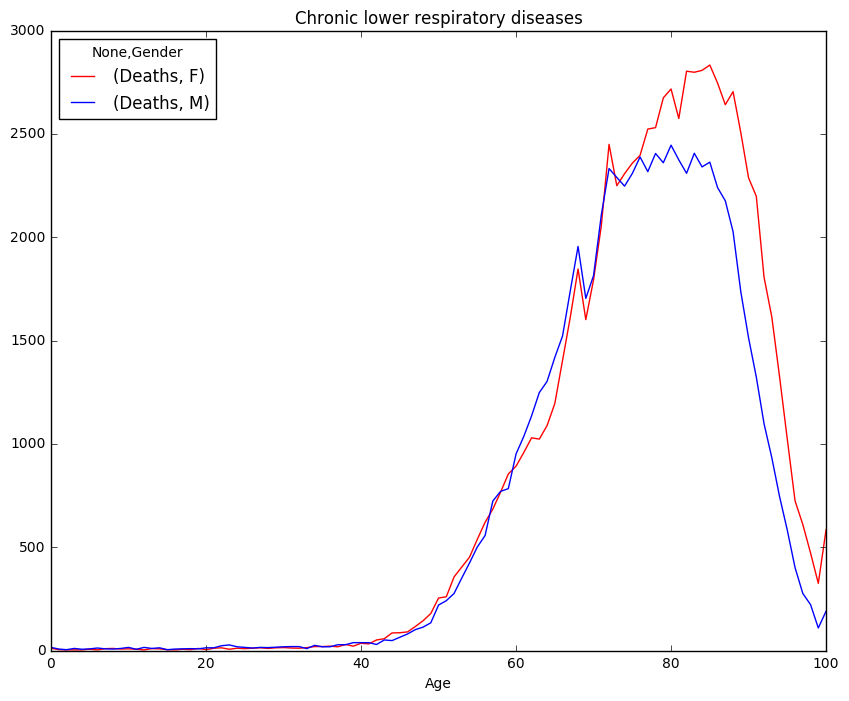

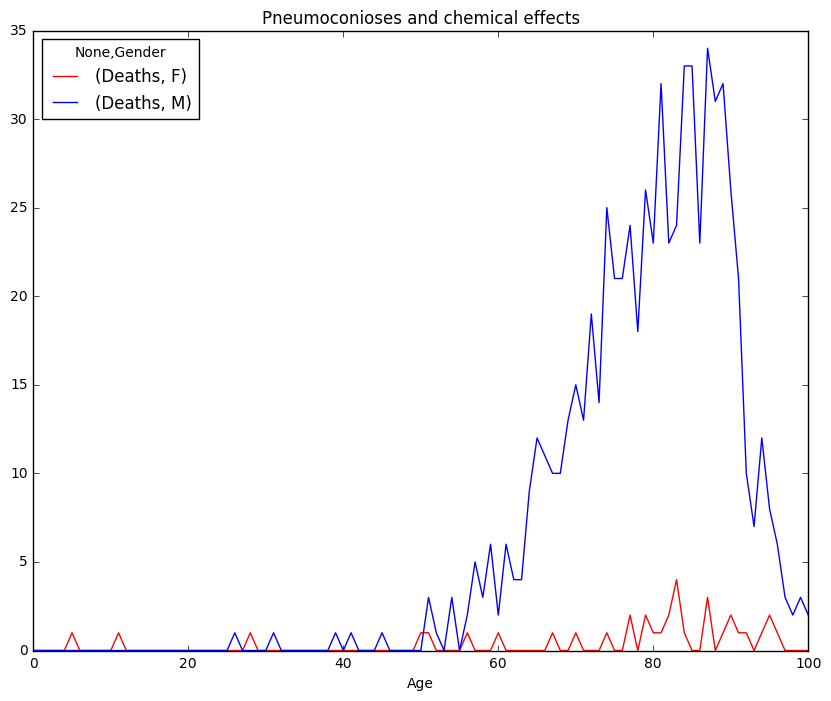

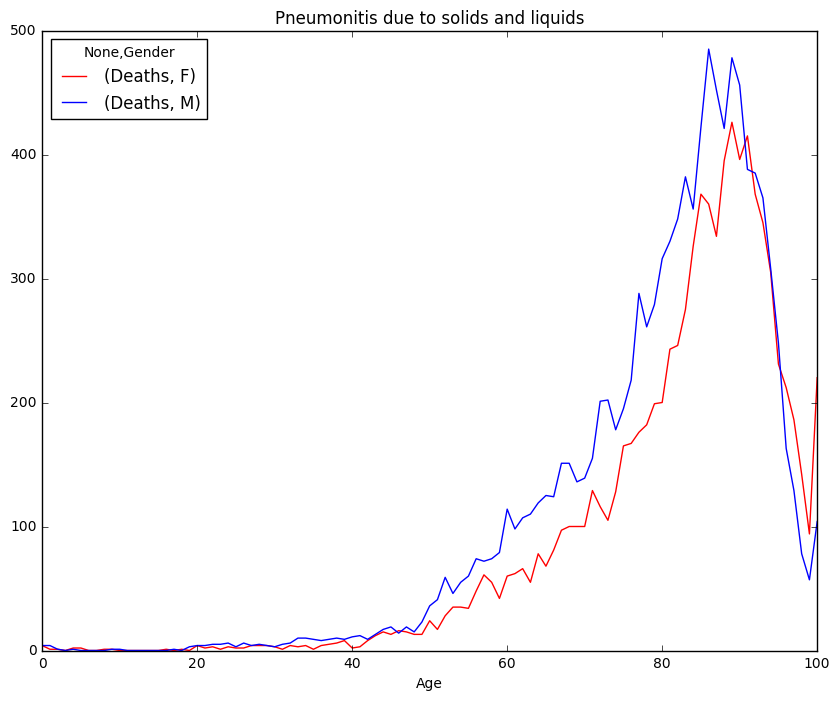

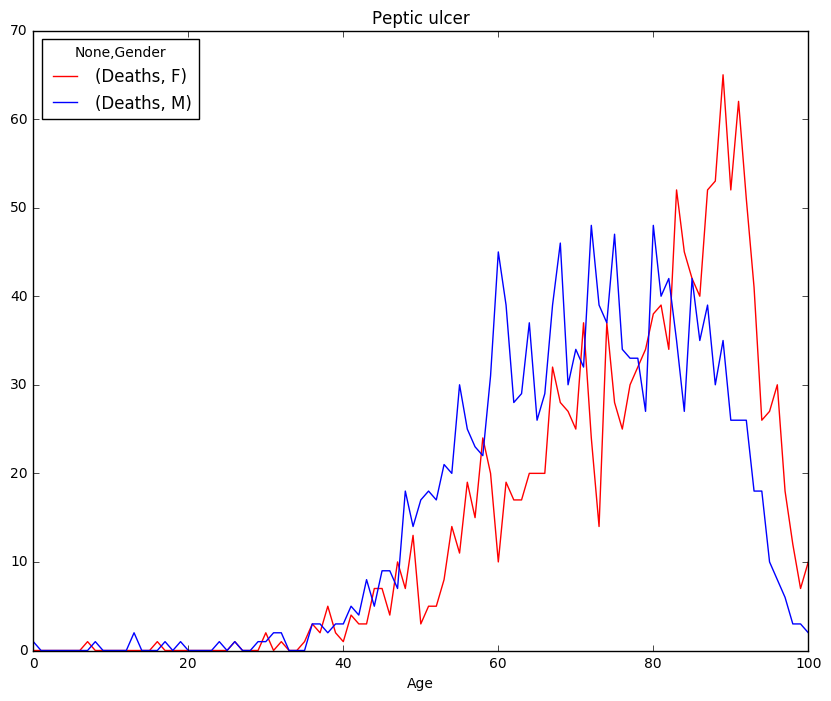

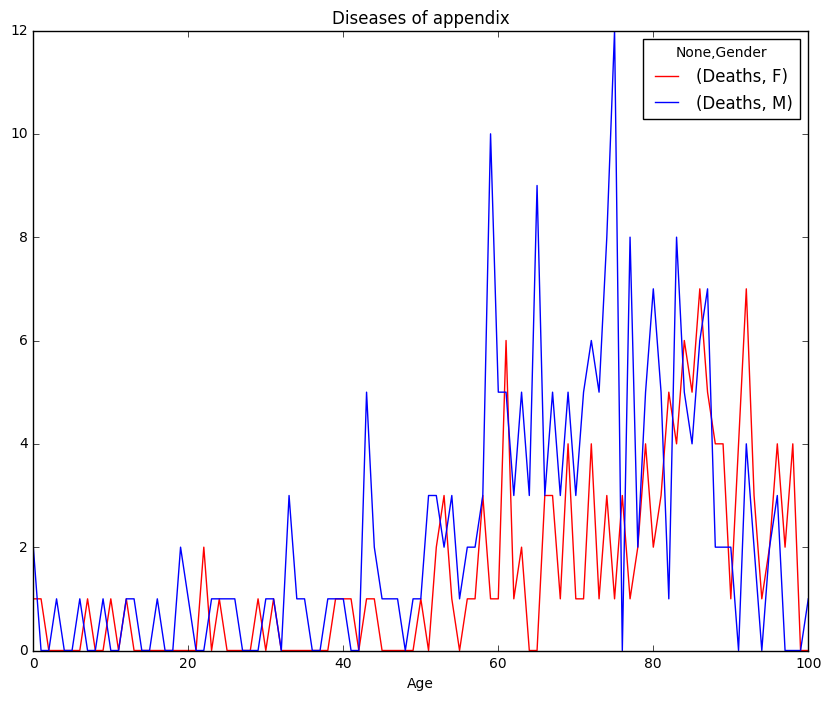

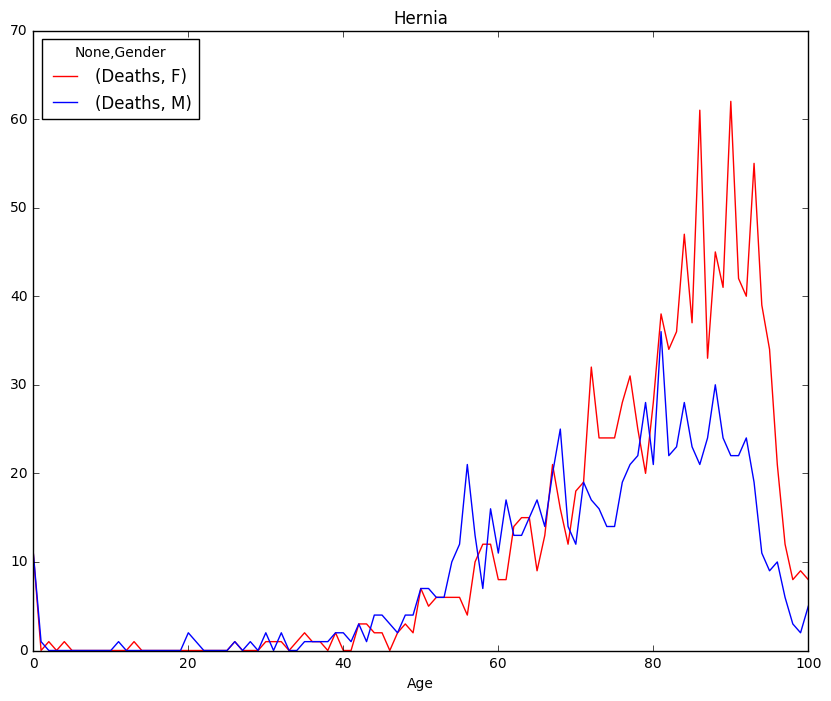

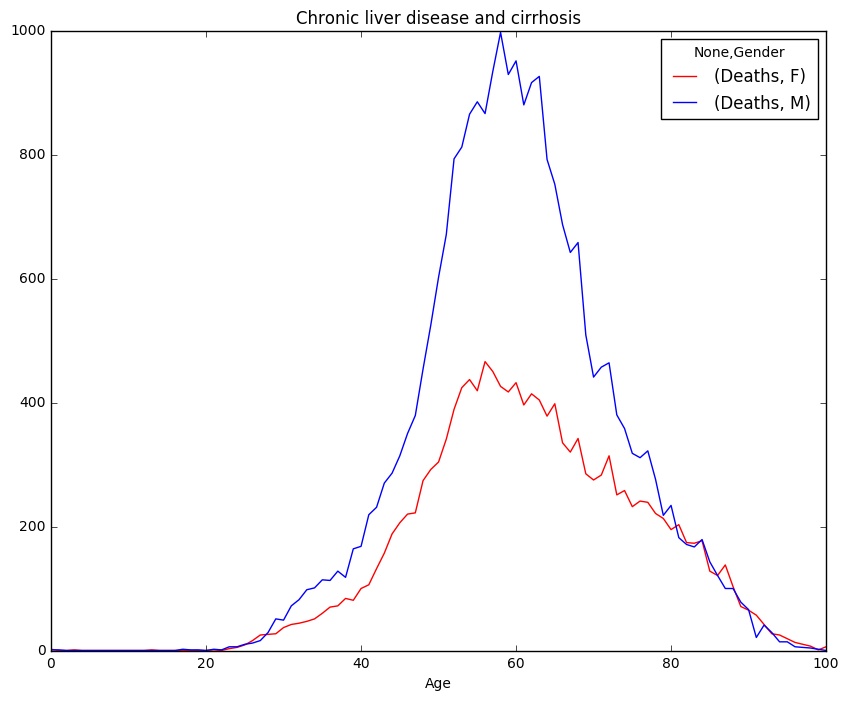

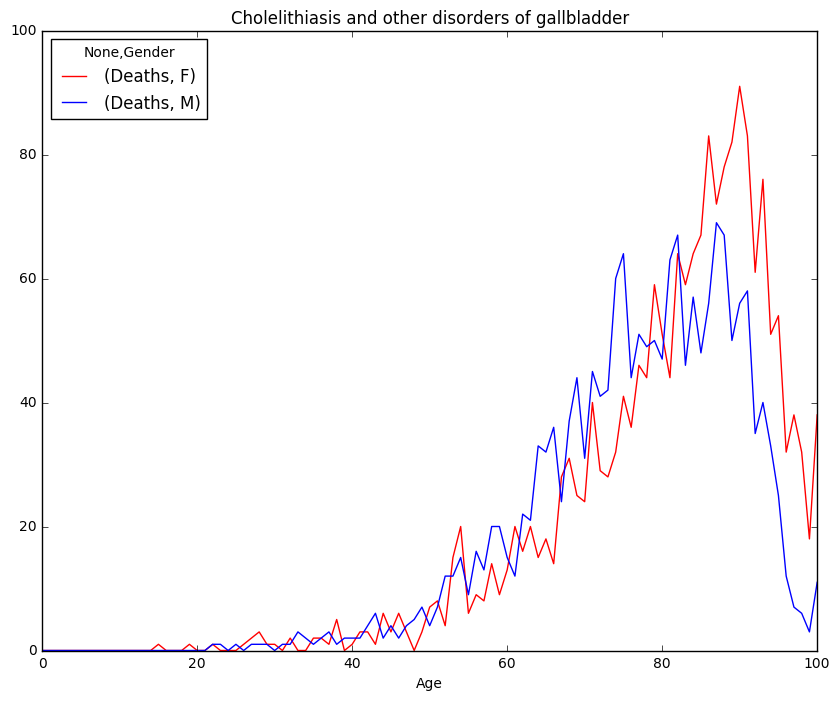

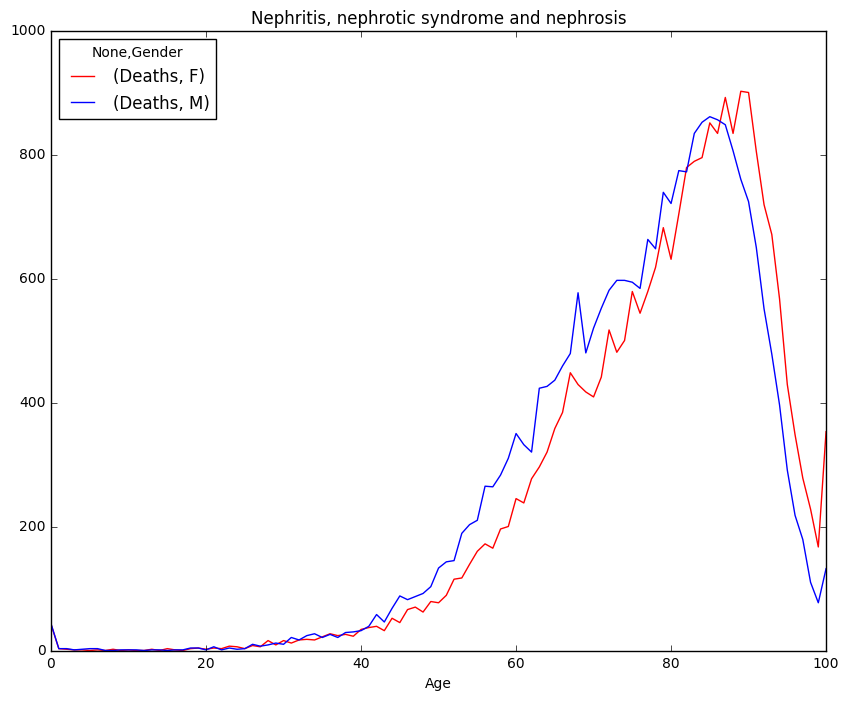

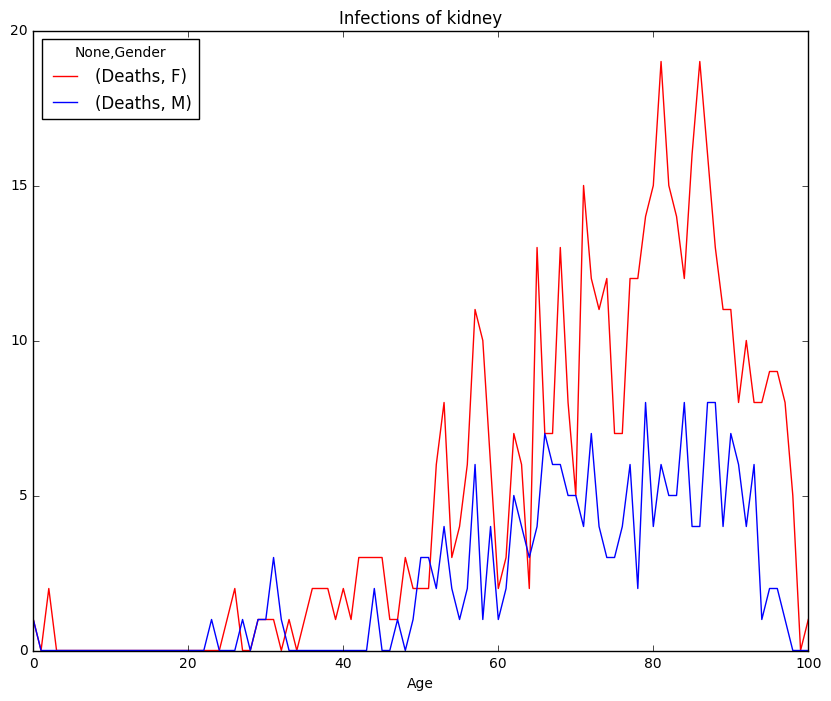

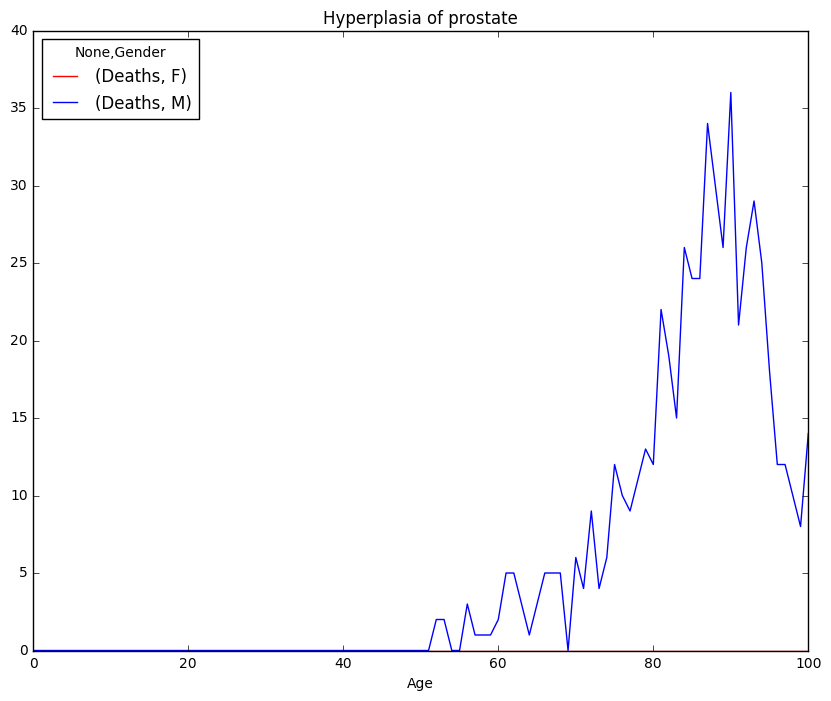

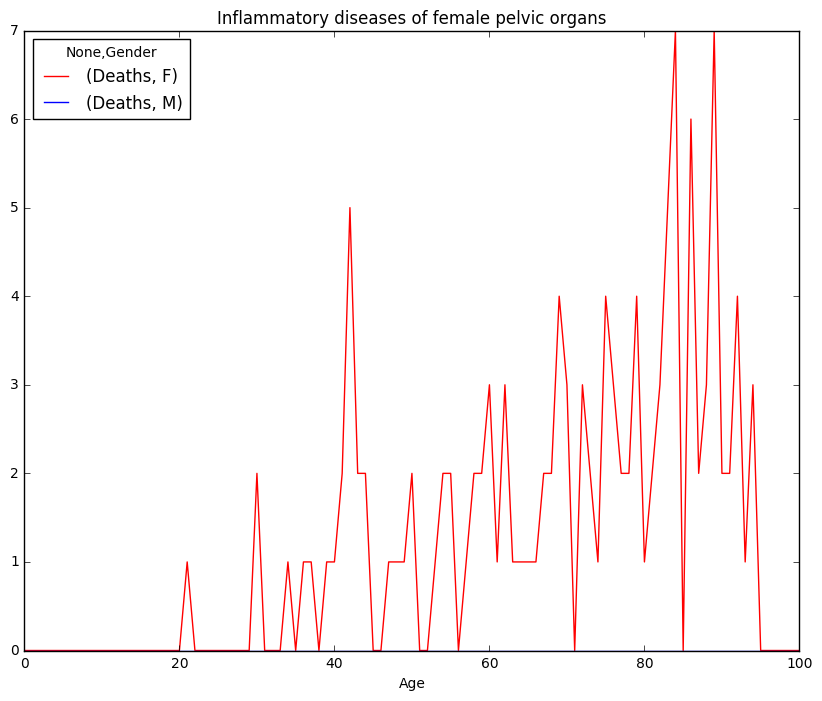

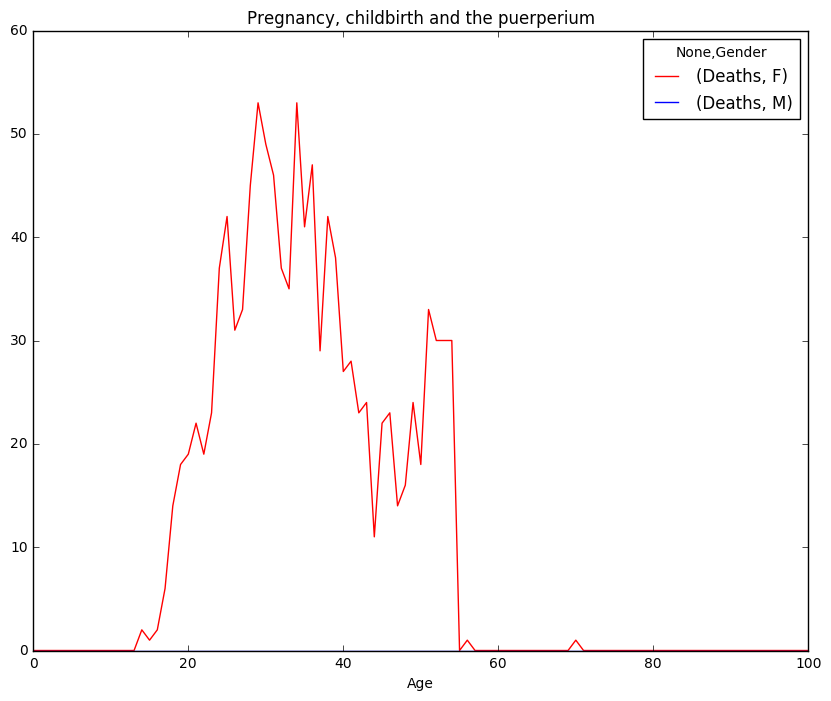

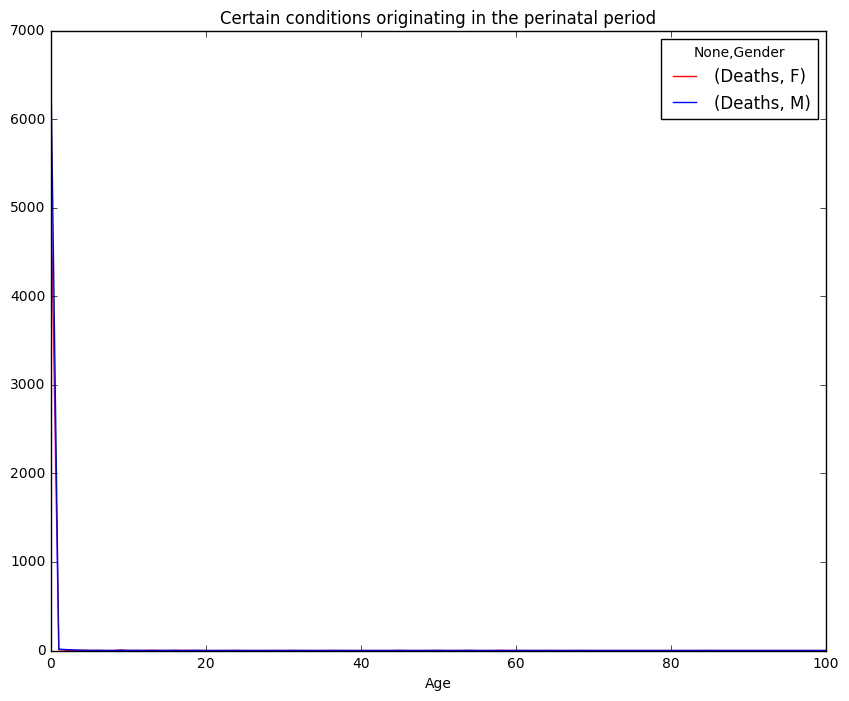

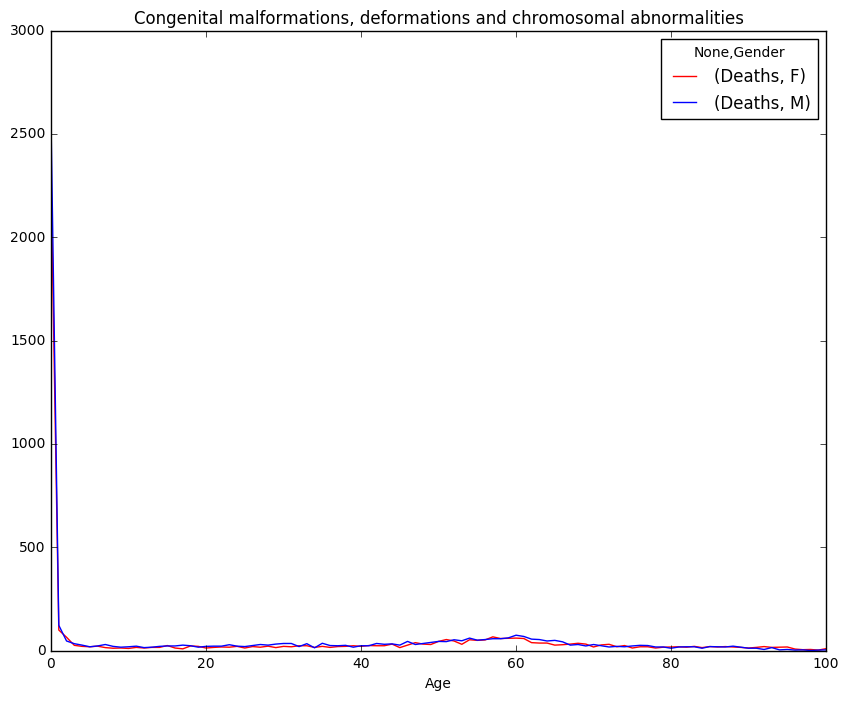

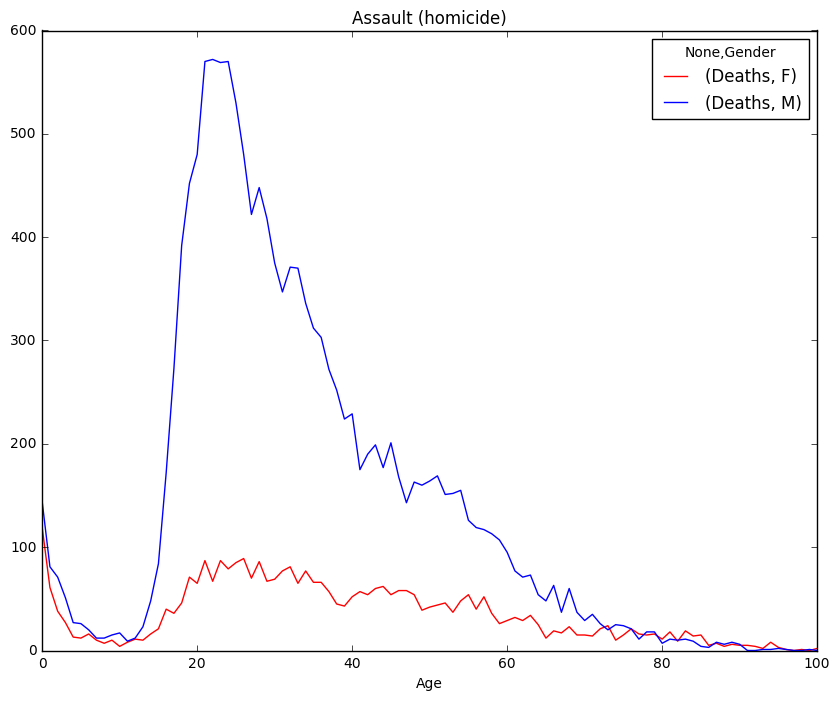

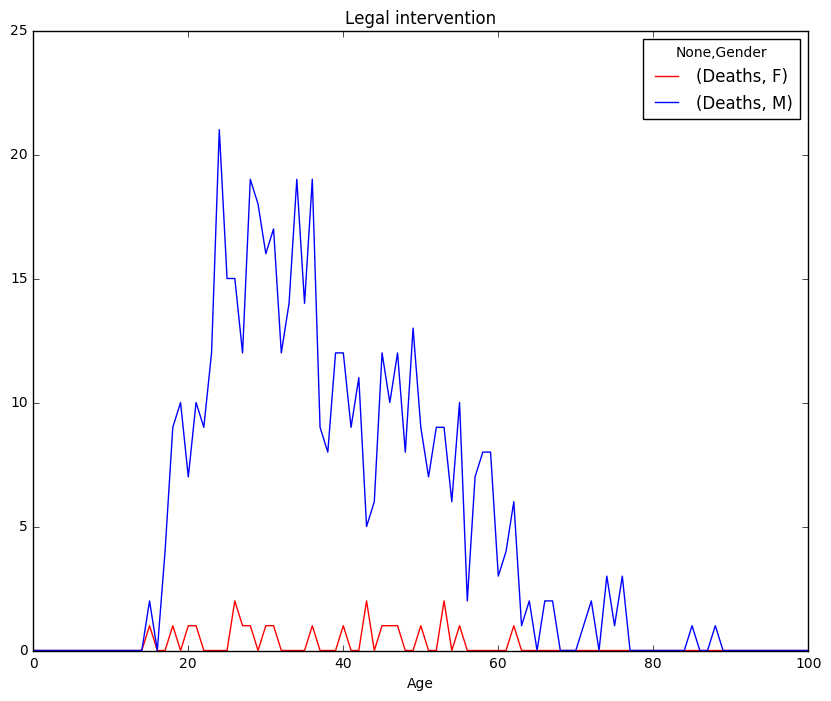

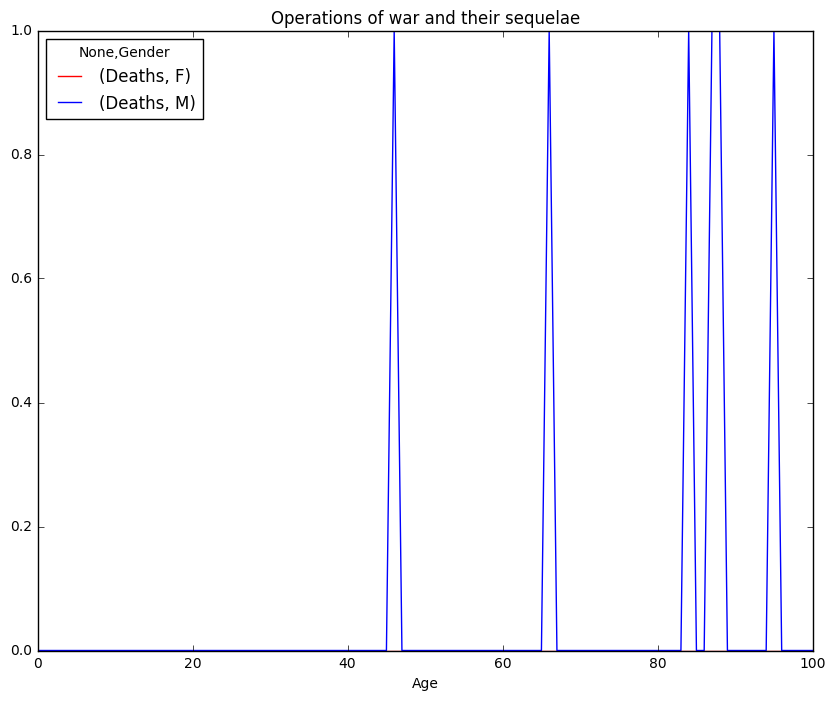

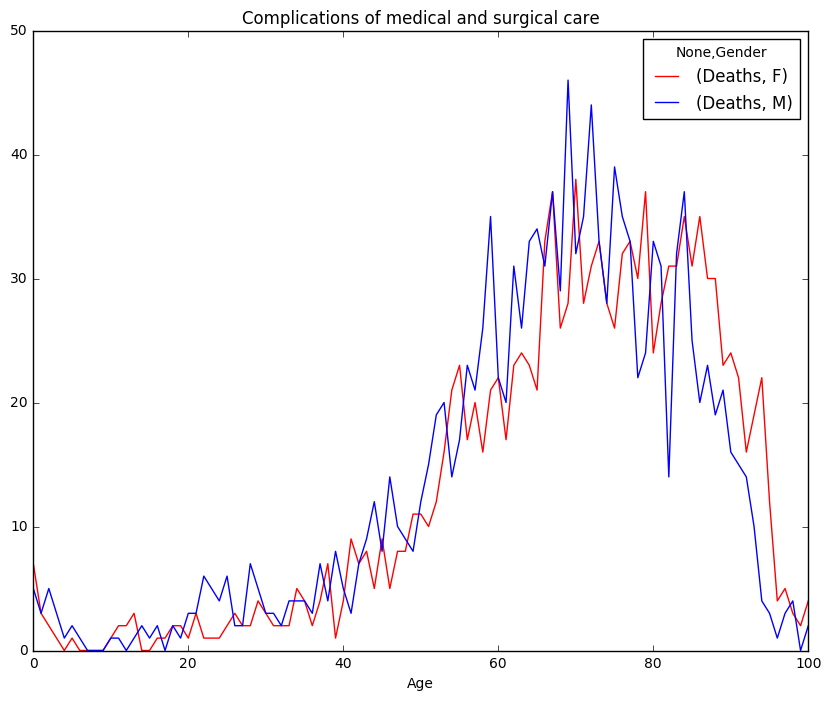

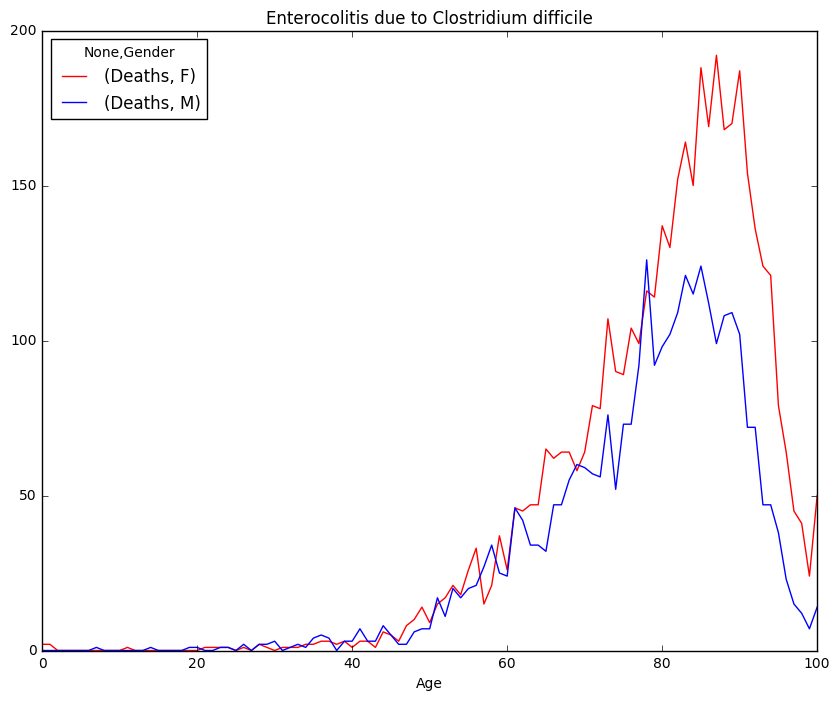

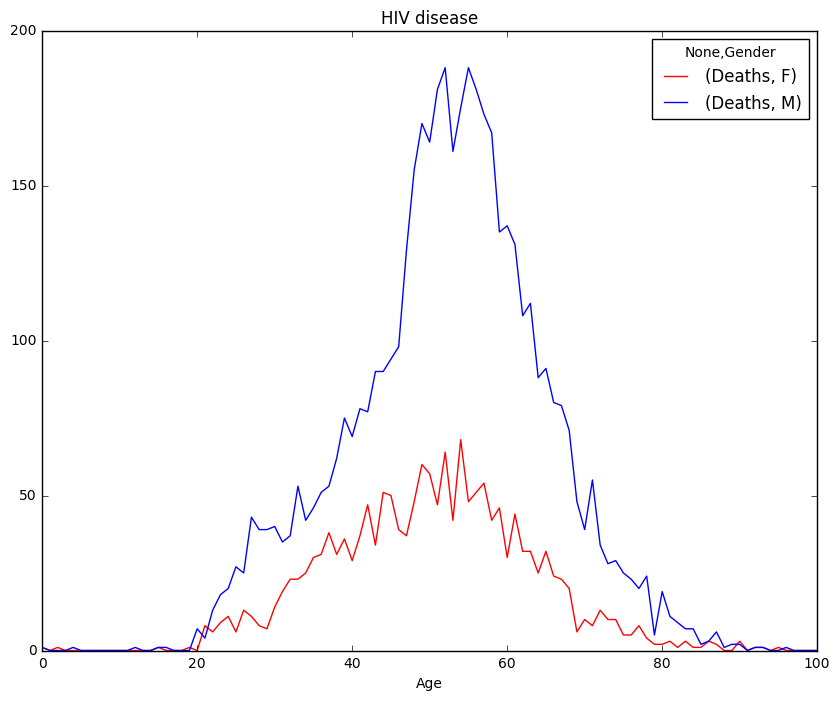

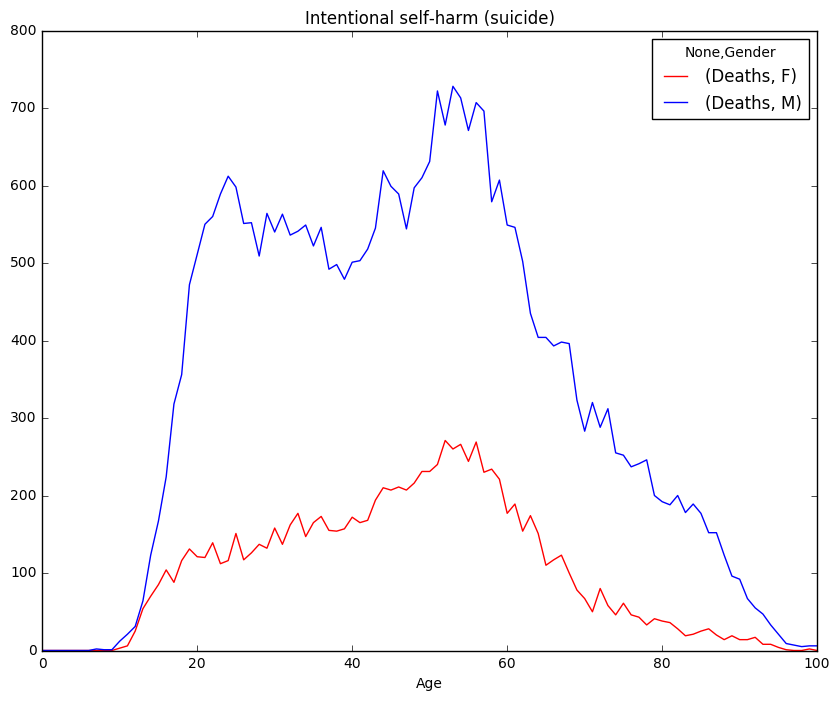

In [56]:
clist = df.Cause.unique()

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age","Gender"])\
    .agg({'Deaths' : sum})\
    .unstack([1])\
    .plot(kind = "line", legend = True, color=('r','b'), figsize = [10,8], title = str(cause))

<hr>

<font color="green"> 讨论: 上述图中你们发现了什么? </font>